# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [117]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
#### load the automobile dataset and create their dataframes
automobile_df = pd.read_csv("automobile.txt")

# Review initial columns & rows. 
automobile_df.head()

# Note, we have '?' marks in the dataset. There may be more...

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [119]:
# Also look at those columns not shown above. 
automobile_df.iloc[:,[10,11,12,13]]

,length,width,height,curb-weight
0,168.8,64.1,48.8,2548
1,168.8,64.1,48.8,2548
2,171.2,65.5,52.4,2823
3,176.6,66.2,54.3,2337
4,176.6,66.4,54.3,2824
...,...,...,...,...
200,188.8,68.9,55.5,2952
201,188.8,68.8,55.5,3049
202,188.8,68.9,55.5,3012
203,188.8,68.9,55.5,3217


In [120]:
# Review dataset information.
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [121]:
#### Using a mix of .unique() and .eq() lets look at the dataset.

# Synmboling is between -2 and 3.
# There are x41 '?' in normalized-losses.
# There are 22 car makes.
# There are two fuel types.
# There are x2 '?' in num-of-doors. 2 uniques values.
# There are 5 body styles 
# There are 3 wheel drives
# 2 engine locations
# 53 wheel-bases
# 75 lengths
# 44 heights
# 44 widths
# 171 curb wieghts
# 7 engine types
# 7 number cyclinders
# 44 engine sizes
# 8 fuel systems
# 39 bores
# 36 strokes, x2 '?'.
# 32 compression ratios
# 59 horesepower, x2 '?'.
# 23 peak rpy, x2 '?'
# 29 city mpg
# 30 highway mpg
# 186 no, x2 '?

# On review of the '?' these chould be removed.

In [122]:
# Lets look at unique values per column (only 1 shown)
search = "normalized-losses"
uniq = automobile_df[search].unique()
uniq_sum = len(uniq)
uniq_sorted = np.sort(uniq)
print(uniq_sorted)
print(uniq_sum)

['101' '102' '103' '104' '106' '107' '108' '110' '113' '115' '118' '119'
 '121' '122' '125' '128' '129' '134' '137' '142' '145' '148' '150' '153'
 '154' '158' '161' '164' '168' '186' '188' '192' '194' '197' '231' '256'
 '65' '74' '77' '78' '81' '83' '85' '87' '89' '90' '91' '93' '94' '95'
 '98' '?']
52


In [123]:
# Let see how many '?''are in per column.
blanks = automobile_df[search].eq("?")
blanks_count = blanks.sum()
print(blanks_count)

# Lets look at how some of those columns look.
blanks = automobile_df[blanks]
blanks.head()

41


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


193


symboling            193
make                 193
fuel-type            193
aspiration           193
num-of-doors         193
body-style           193
drive-wheels         193
engine-location      193
wheel-base           193
length               193
width                193
height               193
curb-weight          193
engine-type          193
num-of-cylinders     193
engine-size          193
fuel-system          193
bore                 193
stroke               193
compression-ratio    193
horsepower           193
peak-rpm             193
city-mpg             193
highway-mpg          193
price                193
dtype: int64

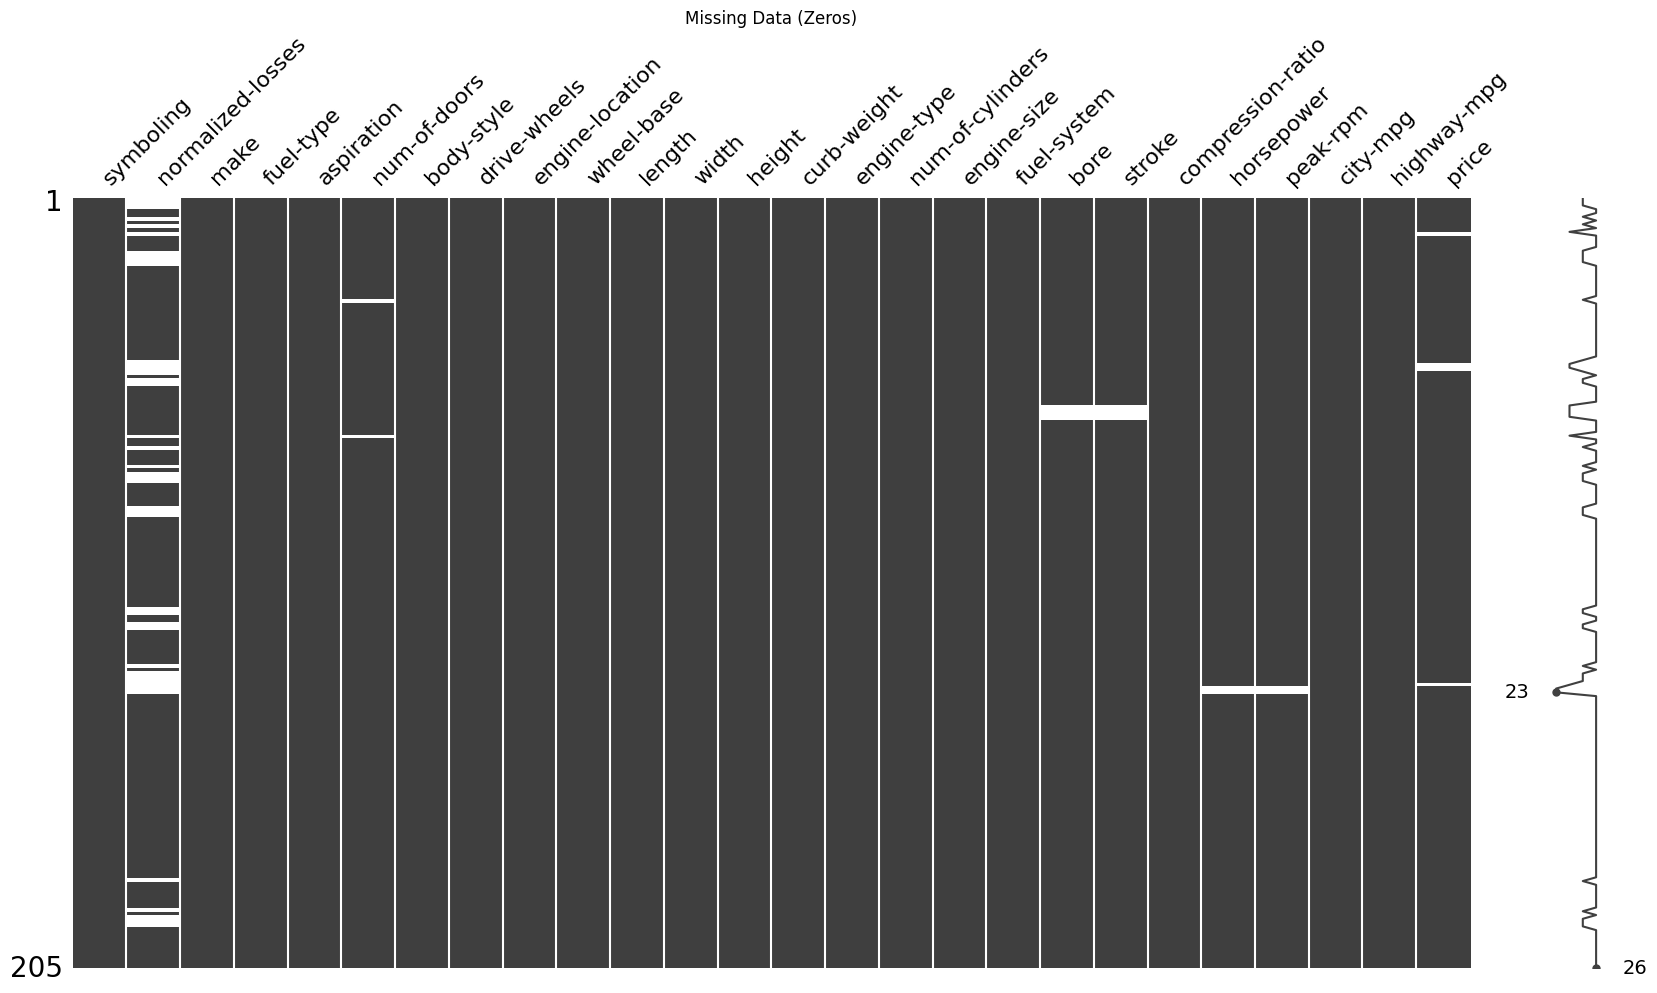

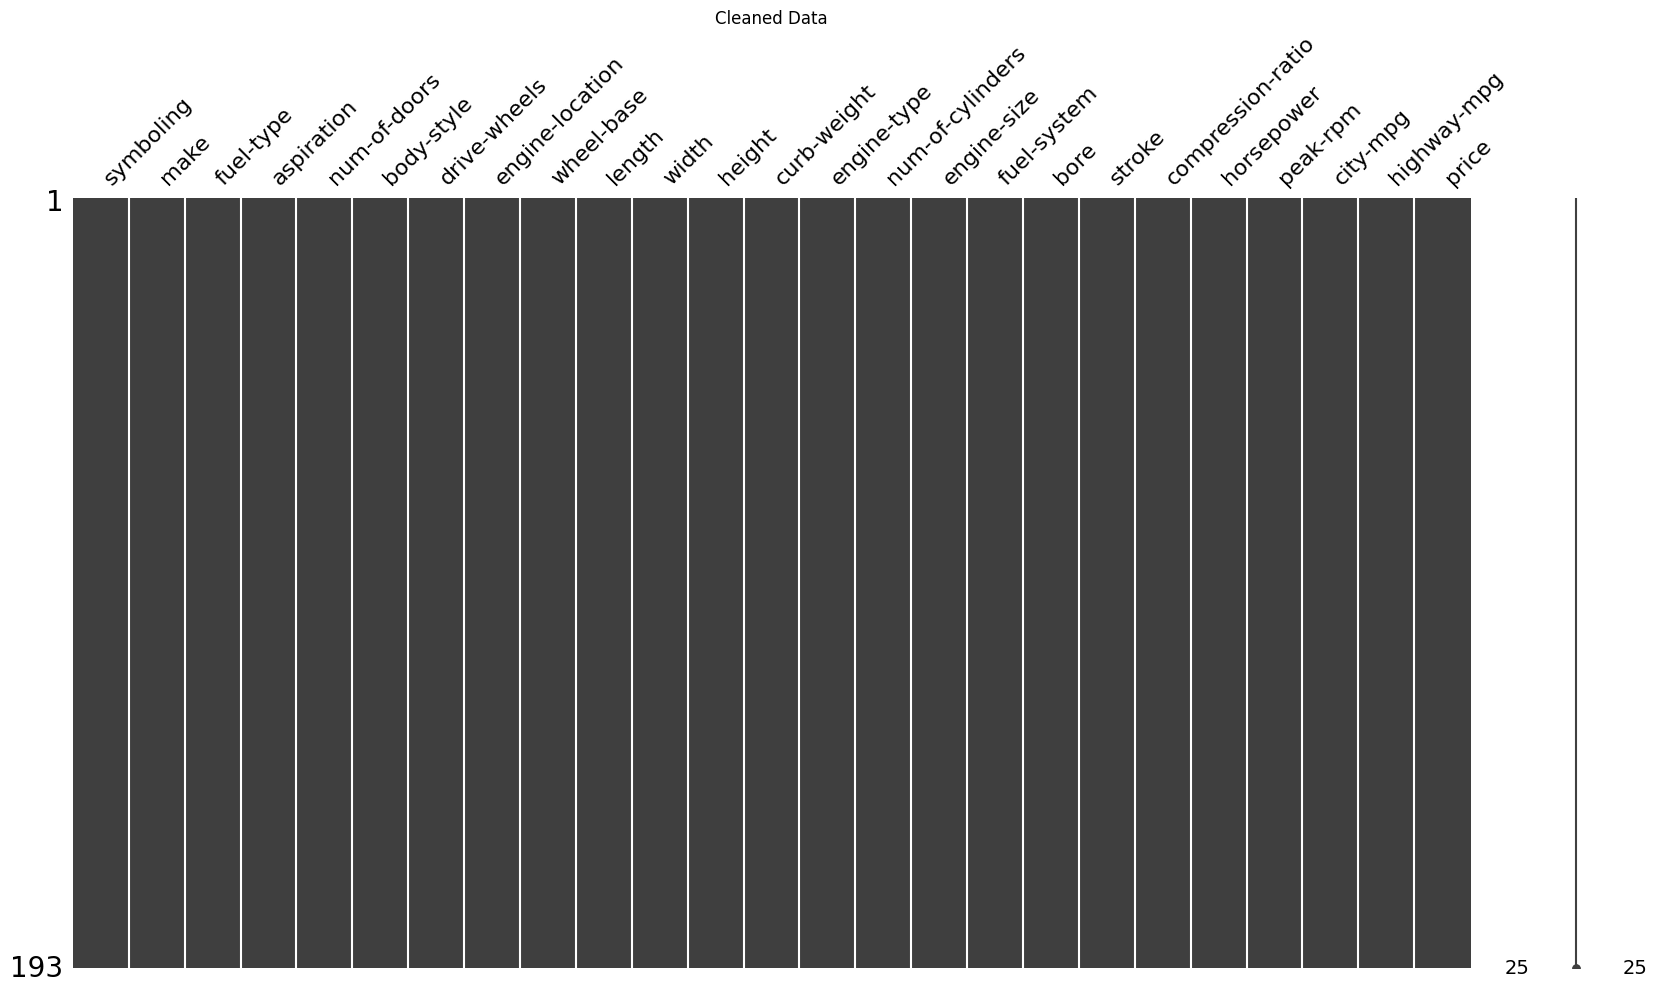

In [124]:
# Let replace all ?'s with NaN values.
automobile_df = automobile_df .replace("?",np.nan)

# Plot graphic of missing values (to visualise)
missingno.matrix(automobile_df , figsize = (20,10))
plt.title("Missing Data (Zeros)");

# Remove normalized-losses column, 
automobile_df.drop(["normalized-losses"],axis = 1, inplace = True)

# Removes all rows with NaN values
automobile_df  = automobile_df .dropna()

# We are left with 193 vehicle entries.

# Plot graphic to visualise cleaning.
missingno.matrix(automobile_df , figsize = (20,10))
plt.title("Cleaned Data");

# Remove duplicate rows (if present...)
automobile_df = automobile_df.drop_duplicates()
num_of_rows = len(automobile_df)
print(num_of_rows)

# Check all column counts.
automobile_df.count()

In [125]:
# Cast price columns from object to int64 data types.
automobile_df["price"] = automobile_df["price"].astype("int64")

# Cast horepower columns from object to int64 data types.
automobile_df["horsepower"] = automobile_df["horsepower"].astype("int64")

# Cast peak_rpm columns from object to int64 data types.
automobile_df["peak-rpm"] = automobile_df["peak-rpm"].astype("int64")

# Cast stroke columns from object to float64 data types.
automobile_df["stroke"] = automobile_df["stroke"].astype("float64")

# Cast bore columns from object to float64 data types.
automobile_df["bore"] = automobile_df["bore"].astype("float64")

# Cast engine-size columns from object to int64 data types.
automobile_df["engine-size"] = automobile_df["engine-size"].astype("int64")

# Lets check classes
print(automobile_df.dtypes) 
automobile_df.head()

# Successful. 

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [126]:
# Average mpg, add to dataframe
automobile_df["avg-mpg"] = 0
automobile_df["avg-mpg"] = ((automobile_df["city-mpg"] + automobile_df["highway-mpg"])/2)

# body volume , add to dataframe
automobile_df["body-volume"] = 0
automobile_df["body-volume"] = (automobile_df["length"] * automobile_df["width"] * automobile_df["height"]) 

# unitweight , add to dataframe
automobile_df["density"] = 0
automobile_df["density"] = (automobile_df["curb-weight"] / automobile_df["body-volume"])

automobile_df.iloc[:,10:30]

,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg,body-volume,density
0,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,24.0,528019.904,0.004826
1,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,24.0,528019.904,0.004826
2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.5,587592.640,0.004804
3,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,27.0,634816.956,0.003681
4,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,20.0,636734.832,0.004435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,25.5,721961.760,0.004089
201,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,22.0,720913.920,0.004229
202,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,20.5,721961.760,0.004172
203,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,26.5,721961.760,0.004456


In [127]:
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,avg-mpg,body-volume,density
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907,28.056995,621283.800466,0.004102
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886,6.555998,80036.736754,0.000506
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,15.000000,452643.156000,0.003287
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000,22.500000,567615.160000,0.003724
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,27.000000,610809.840000,0.004007
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000,32.000000,674941.389000,0.004377
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,51.500000,846007.659000,0.006106


### Now onto the exploration

#### Identify relationships between variables / features

##### Exploration 1st Stage: Look at as much as possible in different ways.

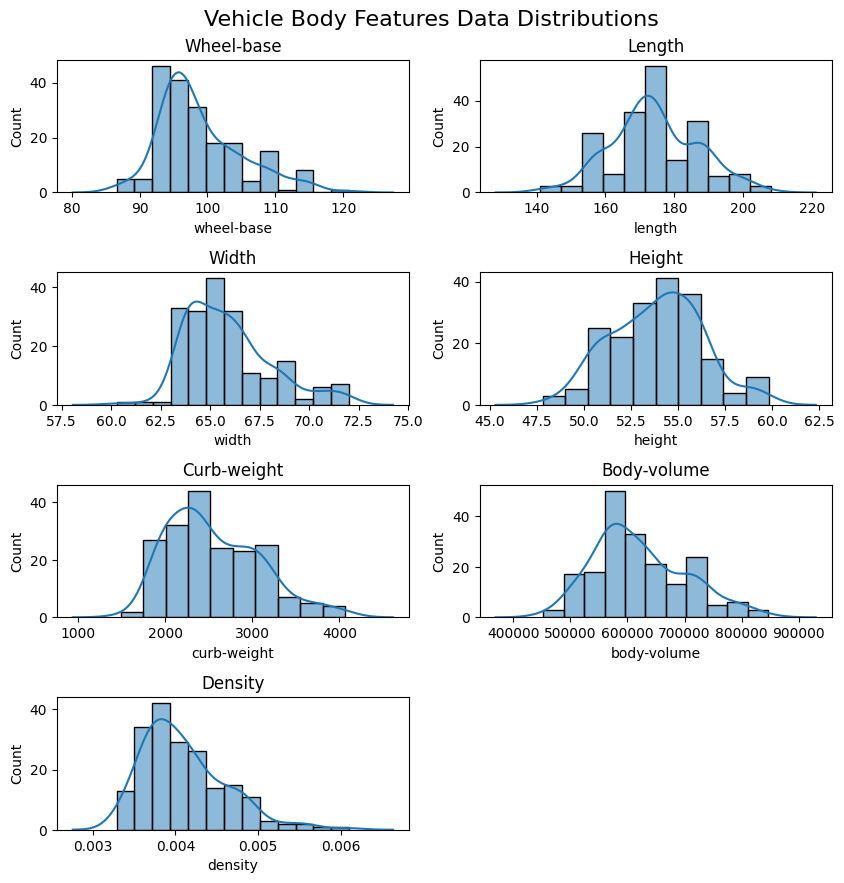

In [128]:
# Create a figure and specify the size
plt.figure(figsize = (10,10))
plt.subplots_adjust(hspace = 0.6)

# Create sup title
plt.suptitle("Vehicle Body Features Data Distributions", size = 16, y = 0.93)

# Create the first subplot
plt.subplot(4, 2, 1)
sns.histplot(x = "wheel-base", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Wheel-base")

# Create the second subplot
plt.subplot(4, 2, 2)
sns.histplot(x = "length", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Length")

# Create the third subplot
plt.subplot(4, 2, 3)
sns.histplot(x = "width", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Width")

# Create the fourth subplot
plt.subplot(4, 2, 4)
sns.histplot(x = "height", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Height")

# Create the fifth subplot
plt.subplot(4, 2, 5)
sns.histplot(x = "curb-weight", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Curb-weight")

# Create the sixth subplot
plt.subplot(4, 2, 6)
sns.histplot(x = "body-volume", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Body-volume")

# Create the seventh subplot
plt.subplot(4, 2, 7)
sns.histplot(x = "density", data = automobile_df, 
             kde = True, kde_kws=dict(cut=3))
plt.title("Density")


plt.show()


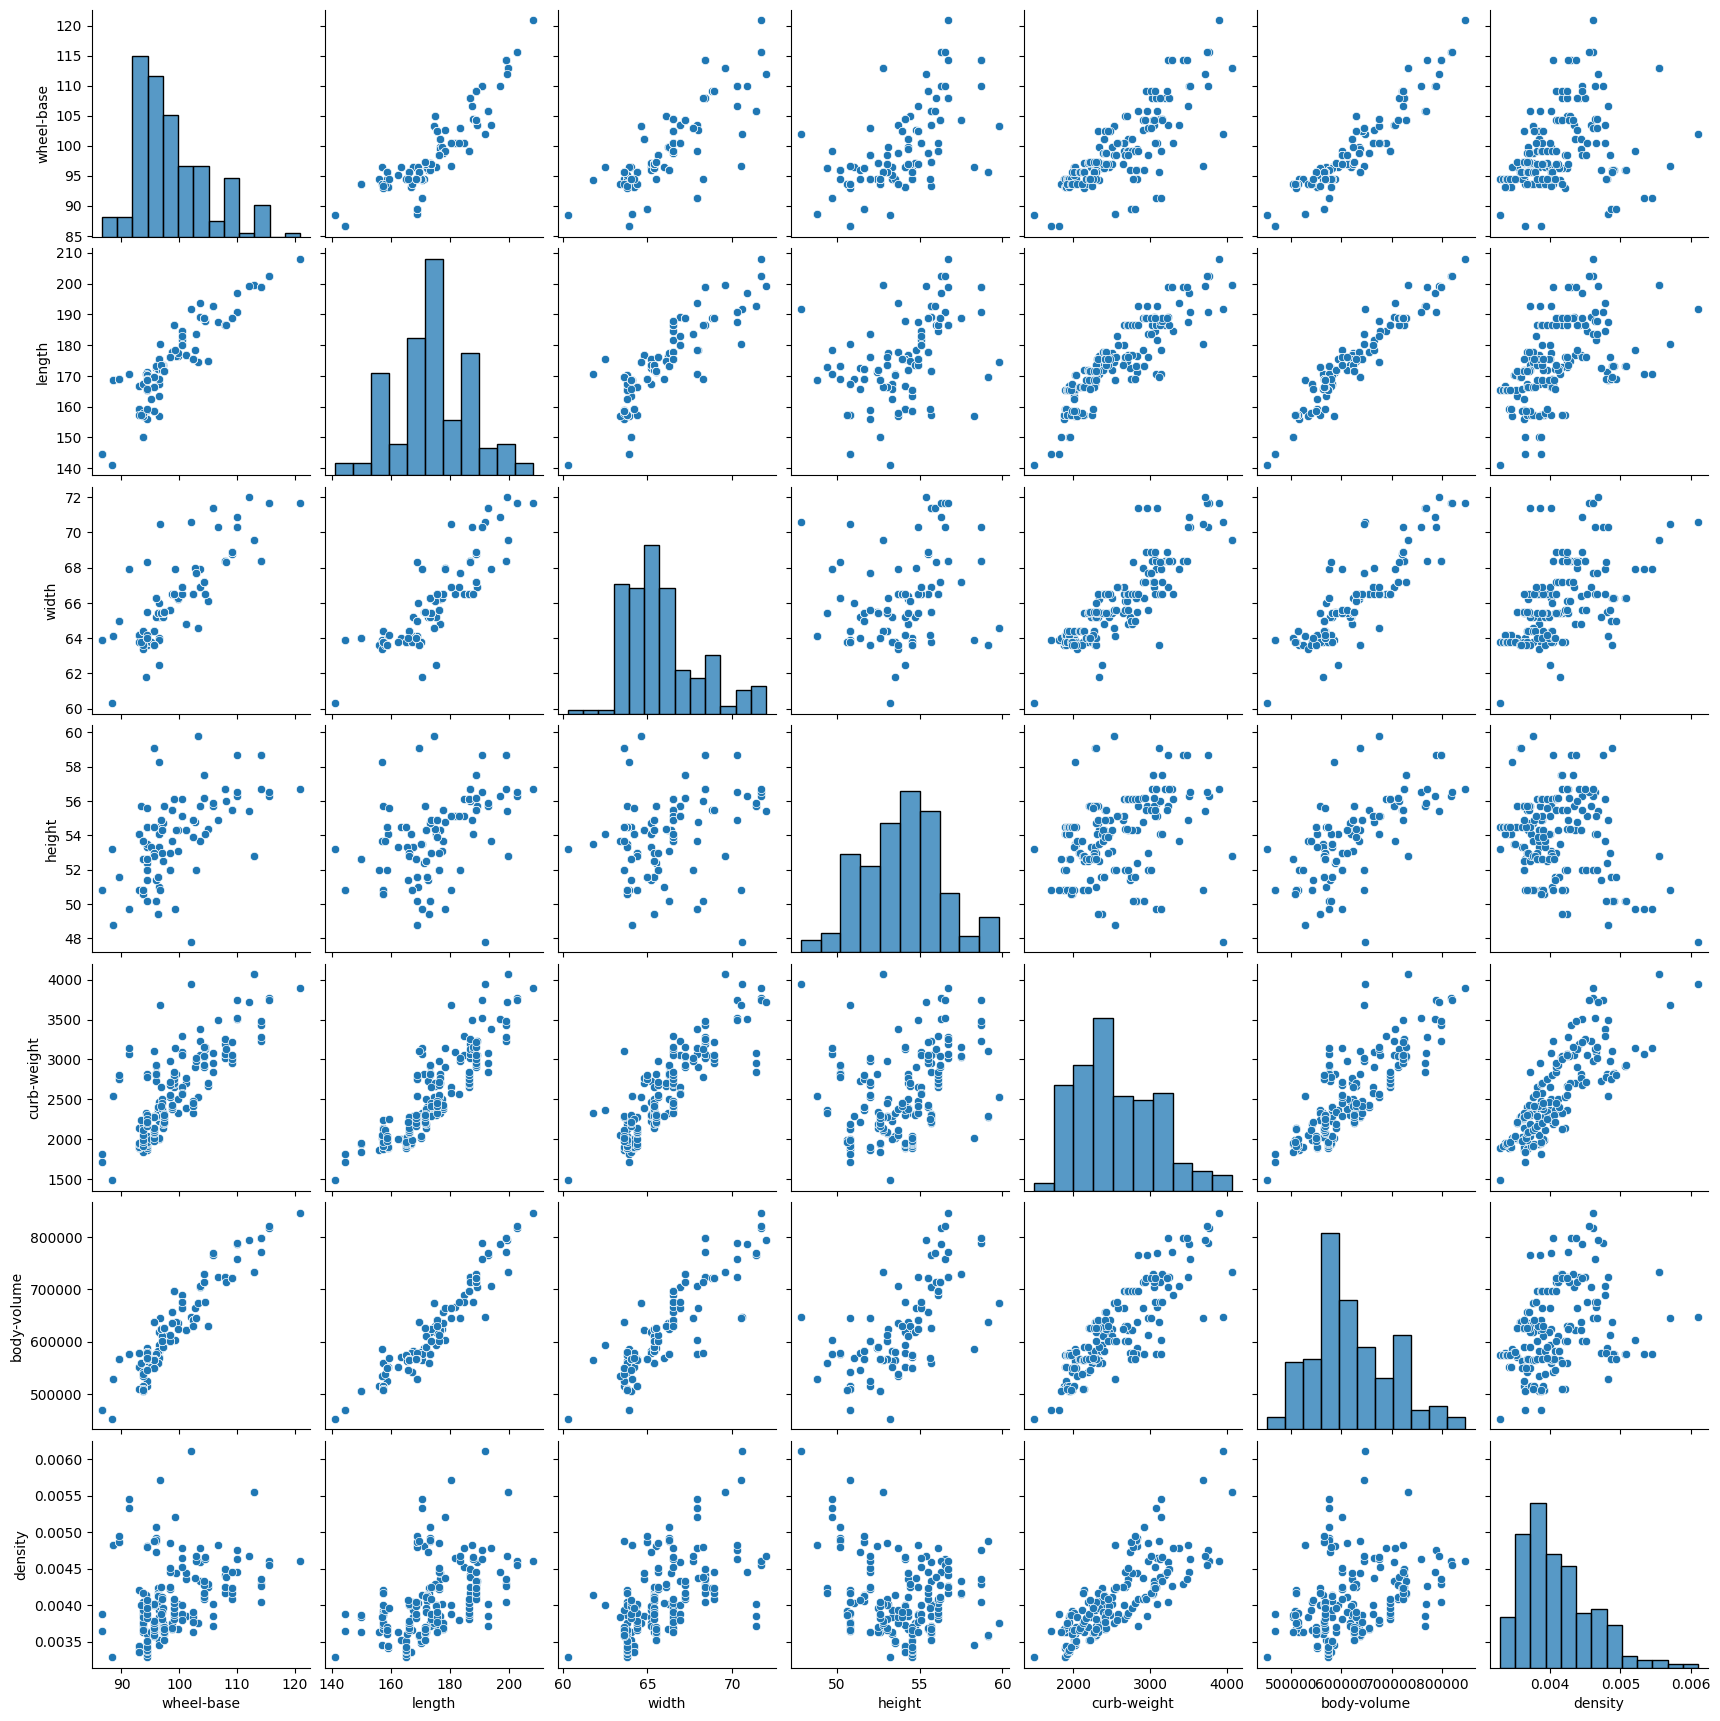

In [129]:
# Car Bodies
sns.pairplot(automobile_df[["wheel-base",
                            "length",
                            "width",
                            "height",
                            "curb-weight",
                            "body-volume",
                            "density"]])

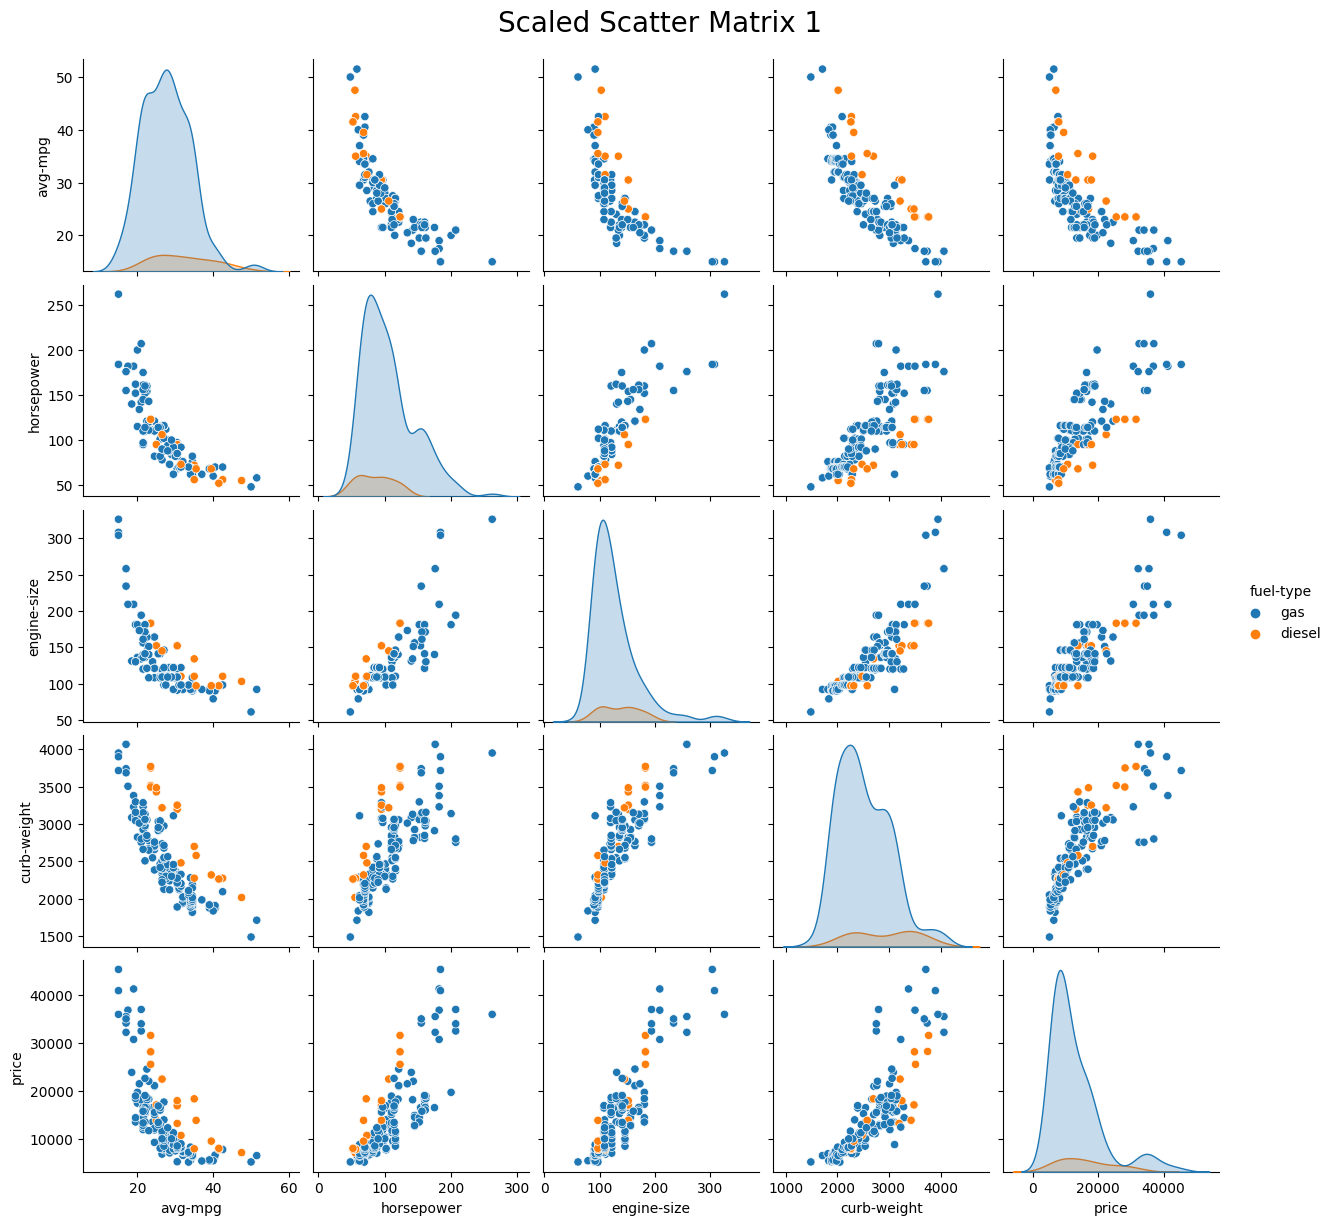

In [130]:
# Car stats general
sns.pairplot(automobile_df[["avg-mpg", 
                            "horsepower", 
                            "engine-size", 
                            "curb-weight",
                            "price",
                            "fuel-type"]], hue="fuel-type")

# Customise plot.
plt.suptitle("Scaled Scatter Matrix 1", fontsize = 20)
plt.subplots_adjust(top=0.94)

#show plot
plt.show()
plt.close()

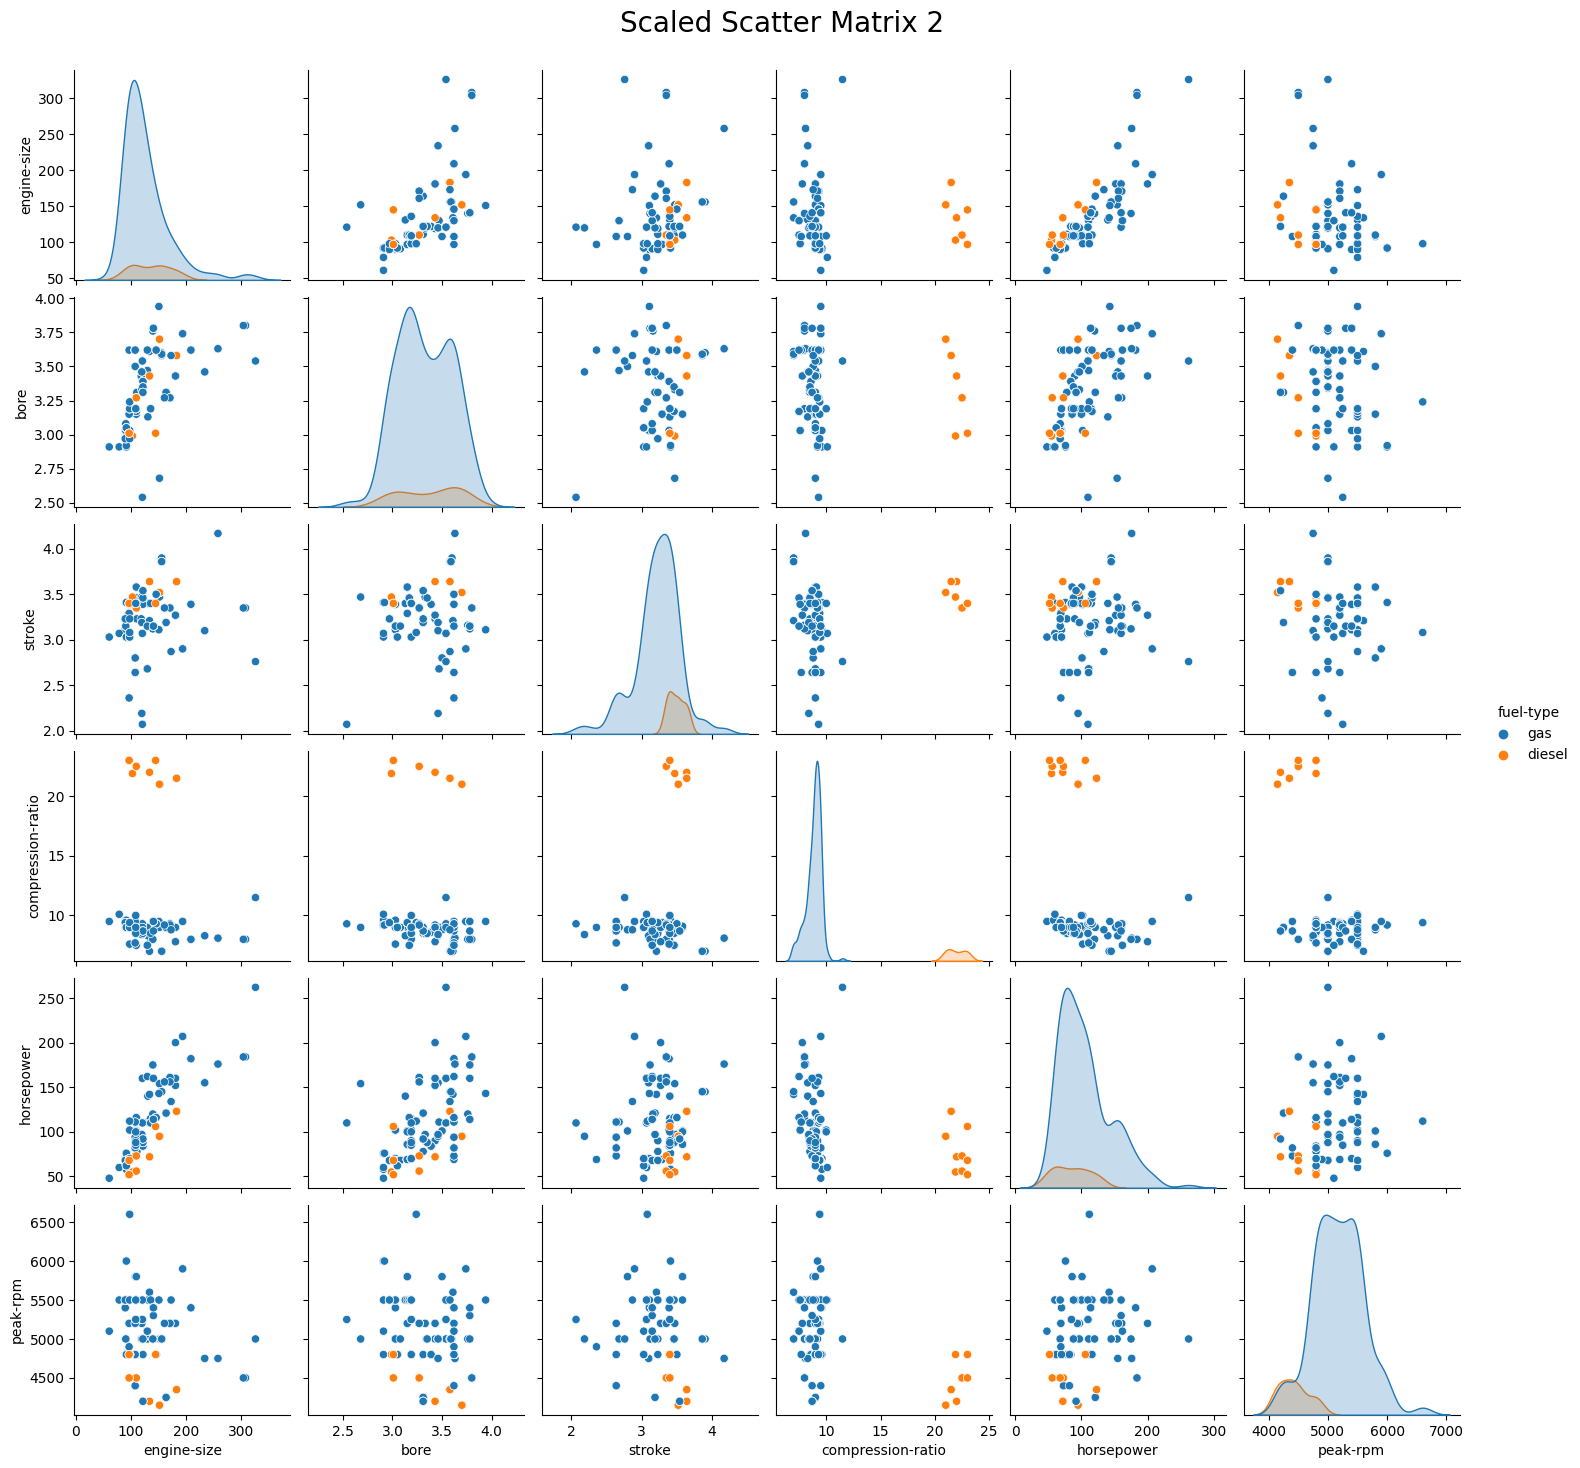

In [131]:
# Car Engines
sns.pairplot(automobile_df[["engine-size",
                            "bore",
                            "stroke",
                            "compression-ratio",
                            "horsepower",
                            "peak-rpm",
                            "fuel-type"]], hue="fuel-type")

# Customise plot.
plt.suptitle("Scaled Scatter Matrix 2", fontsize = 20)
plt.subplots_adjust(top=0.94)

#show plot
plt.show()
plt.close()

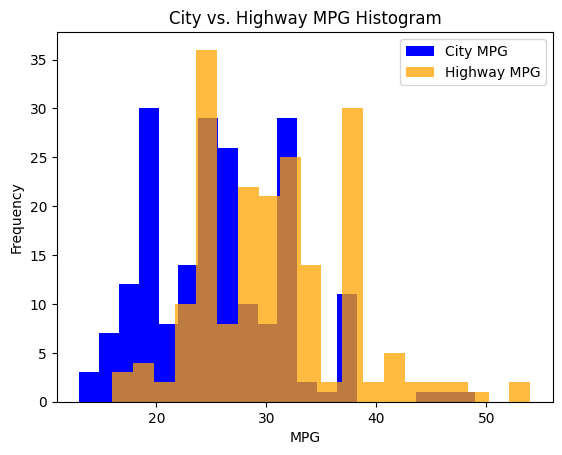

In [132]:
# Create the histogram of city and high mpgs.
plt.hist(automobile_df["city-mpg"], bins=20, color='blue', label = "City MPG")
plt.hist(automobile_df["highway-mpg"], bins=20, color='orange', alpha=0.75, label = "Highway MPG")

# Add labels and title
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('City vs. Highway MPG Histogram')
plt.legend()

# Show plot
plt.show()
plt.close()

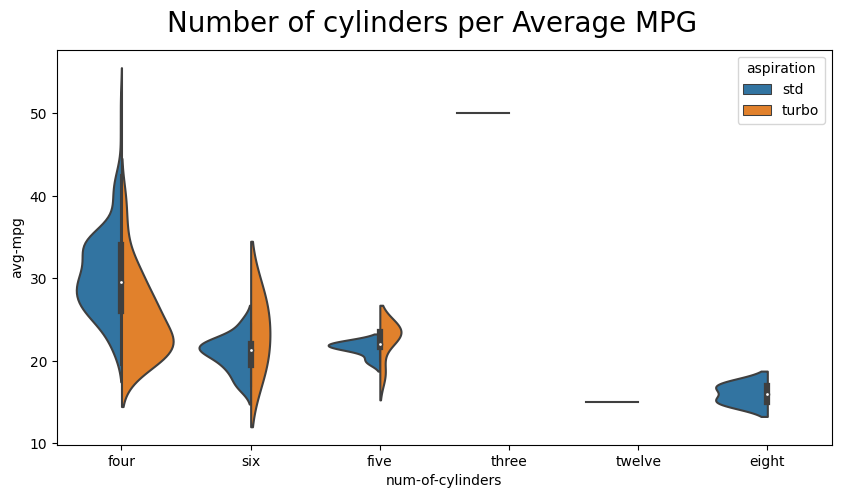

In [133]:
# Create a violinplot of cylinders / mpg / aspiration.
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "num-of-cylinders", y = "avg-mpg", hue = "aspiration", split = True)

# Customise Plot
plt.suptitle("Number of cylinders per Average MPG", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

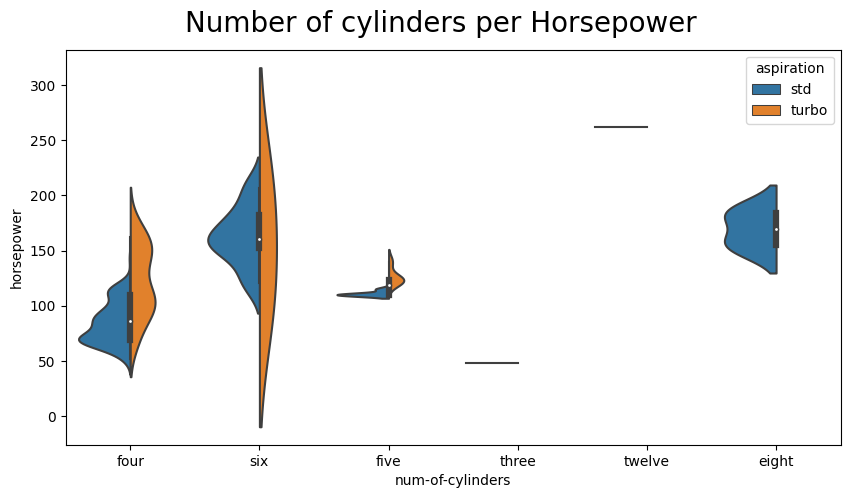

In [134]:
# Create a violinplot of cylinders / horsepower / aspiration.
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "num-of-cylinders", y = "horsepower", hue= "aspiration",split = True)

# Customise Plot
plt.suptitle("Number of cylinders per Horsepower", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

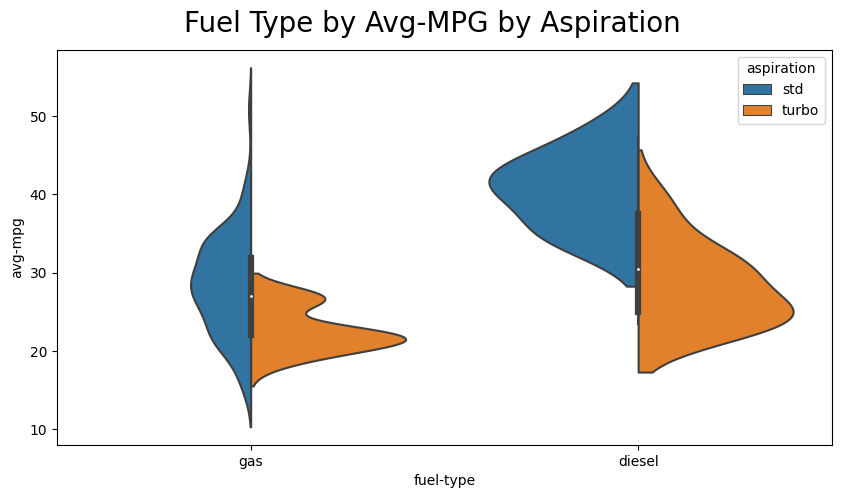

In [135]:
# Create a violinplot of fuel, mpg, aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "fuel-type", y = "avg-mpg", hue = "aspiration", split = True)


# Customise Plot
plt.suptitle("Fuel Type by Avg-MPG by Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

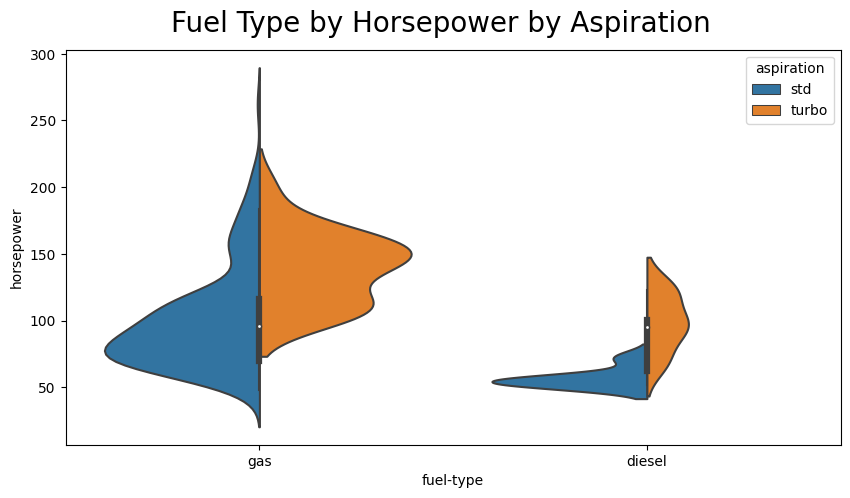

In [136]:
# Create a violinplot of fuel, horsepower, aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "fuel-type", y = "horsepower", hue = "aspiration", split = True)

# Customise Plot
plt.suptitle("Fuel Type by Horsepower by Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

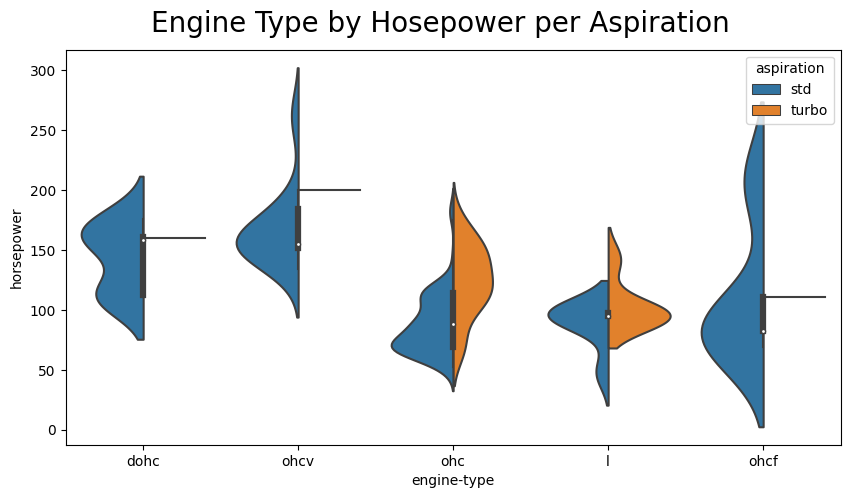

In [137]:
# Create a violinplot of engine type, horsepower, aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "engine-type", y = "horsepower", hue= "aspiration", split=True)


# Customise Plot
plt.suptitle("Engine Type by Hosepower per Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

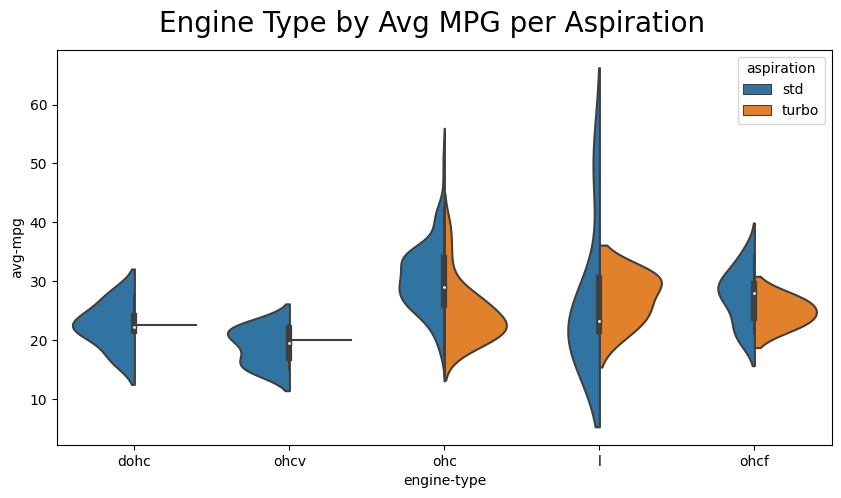

In [138]:
# Create a violinplot of engine type, mpg, aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "engine-type", y = "avg-mpg", hue= "aspiration", split = True)


# Customise Plot
plt.suptitle("Engine Type by Avg MPG per Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

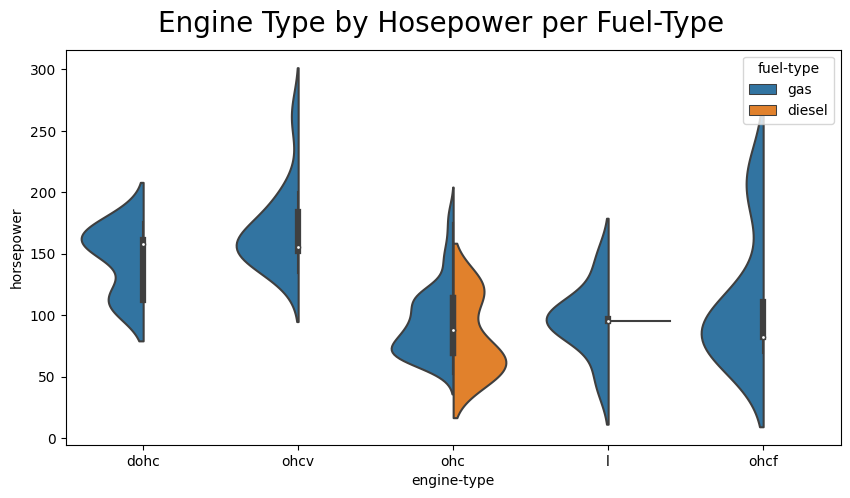

In [139]:
# Create a violinplot of engine type, horsepower, fuel 
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "engine-type", y = "horsepower", hue= "fuel-type", split = True)

# Customise Plot
plt.suptitle("Engine Type by Hosepower per Fuel-Type", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

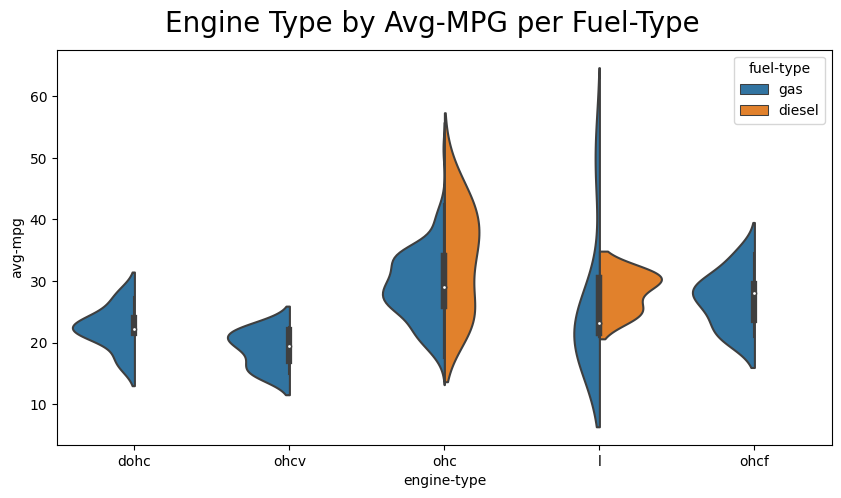

In [140]:
## Create a violinplot of engine type, mpg, fuel.
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, x = "engine-type", y = "avg-mpg", hue= "fuel-type", split = True)

# Customise Plot
plt.suptitle("Engine Type by Avg-MPG per Fuel-Type", fontsize = 20)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()
plt.close()

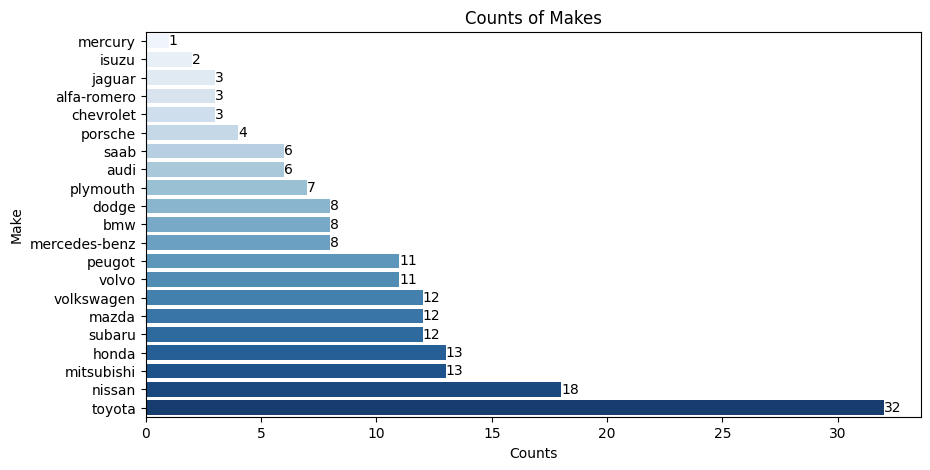

In [141]:
# Get Make counts
makes_grouped = automobile_df.groupby("make").size().sort_values(ascending=True)

# Barplot per make counts
plt.figure(figsize = (10,5))
ax = sns.barplot(x=makes_grouped.values, y=makes_grouped.index, orient="h",palette="Blues")
plt.xlabel("Counts")
plt.ylabel("Make")
plt.title("Counts of Makes")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()

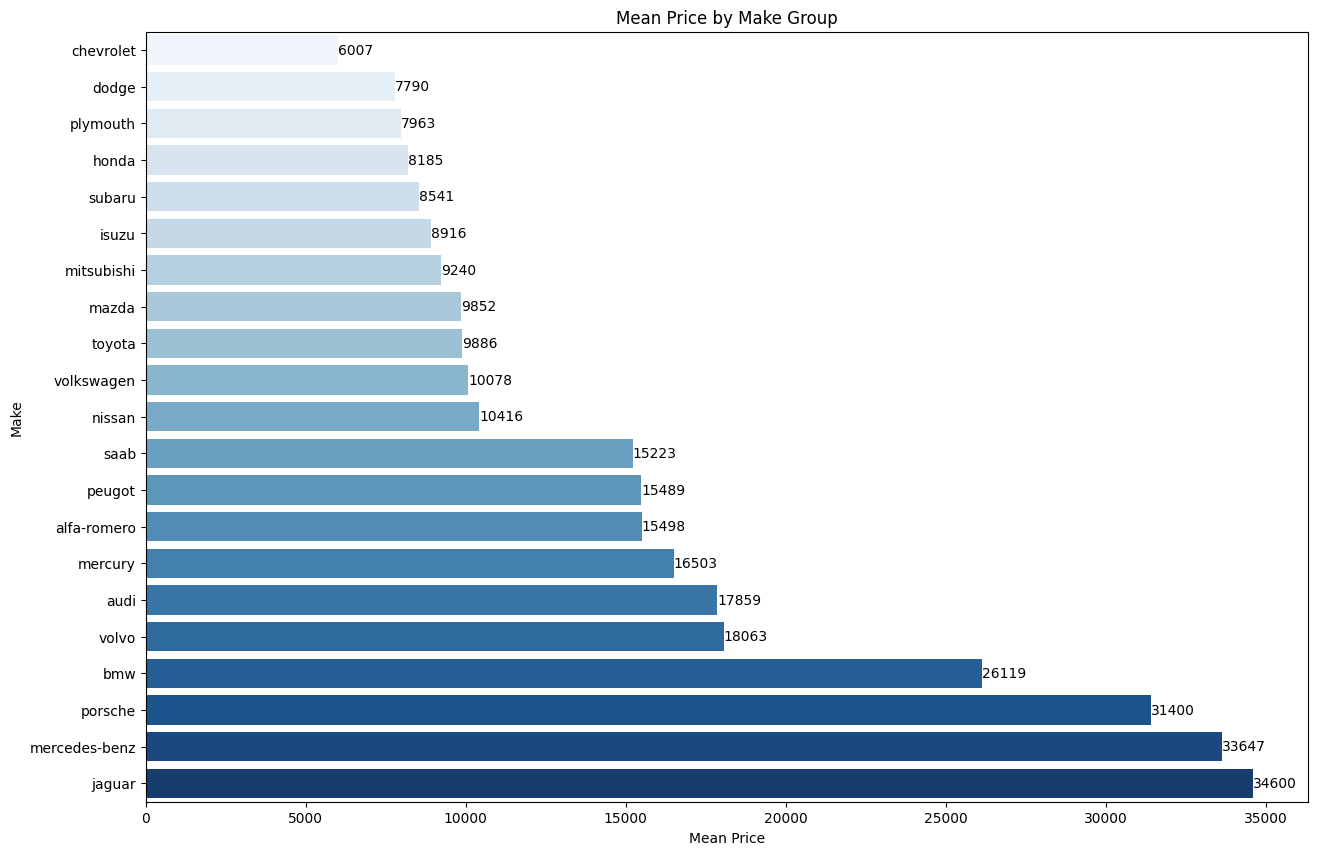

In [142]:
# Calculate mean price per car make.
makes_price_grouped = (automobile_df.groupby("make")
                       ["price"].mean().round().sort_values(ascending=True))
makes_price_grouped

# Bar plot avg price per car make
plt.figure(figsize = (15,10))
ax = sns.barplot(x=makes_price_grouped.values,
                 y=makes_price_grouped.index, 
                 orient='h',
                 palette="Blues")

#Customise Plot
plt.xlabel("Mean Price")
plt.ylabel("Make")
plt.title("Mean Price by Make Group")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

plt.show()


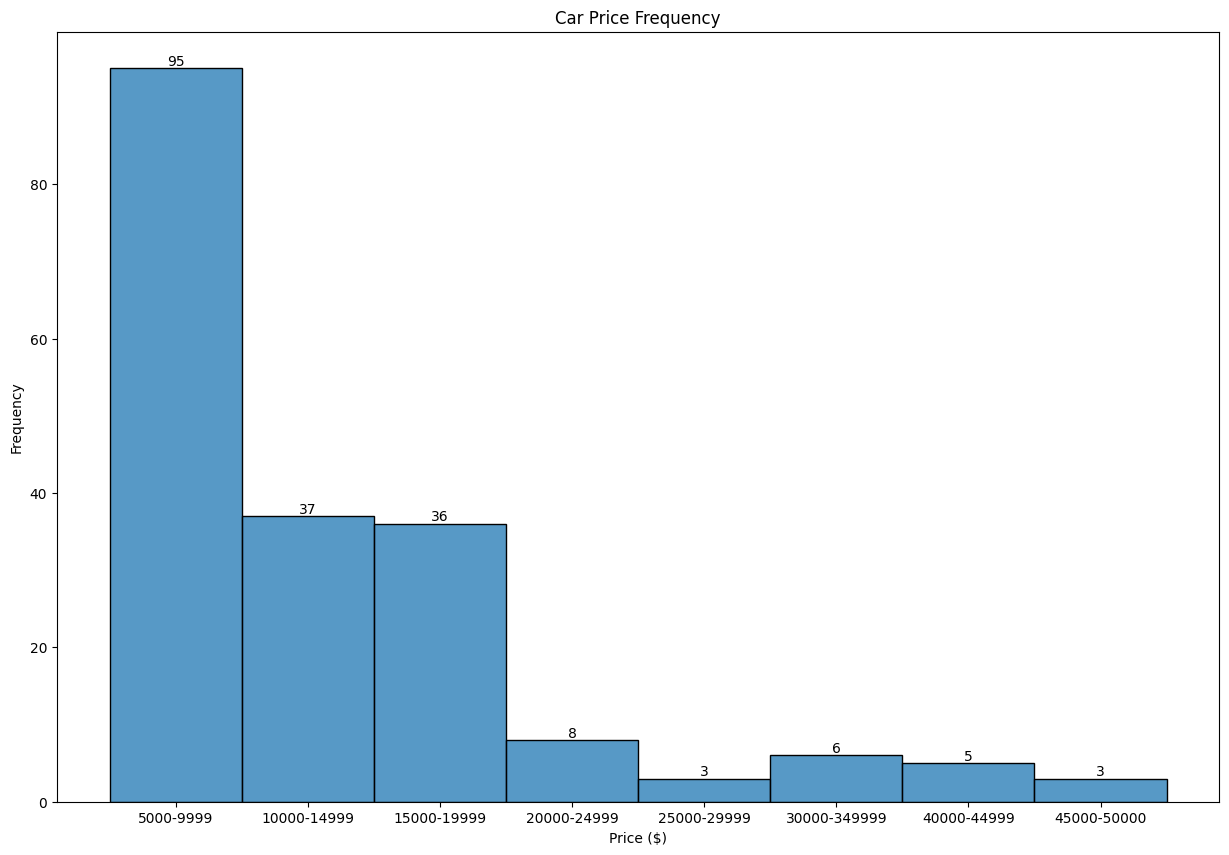

In [143]:
# Define survived age brackets/bins
price_group = pd.cut(automobile_df['price'], [5000, 9999,14999,19999,24999,29999,
                                              34999,39999,50000], 
                   labels=['5000-9999','10000-14999','15000-19999','20000-24999',
                           '25000-29999','30000-349999','40000-44999','45000-50000']);

plt.figure(figsize=(15,10))
ax = sns.histplot(data=automobile_df, x=price_group)

# Customise PLot 
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Car Price Frequency")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()

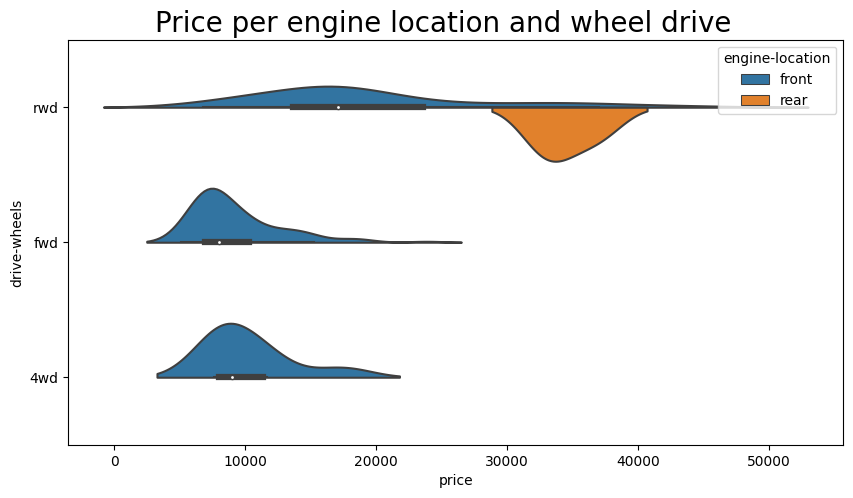

In [144]:
# Engine location / price / drive wheels
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "price", 
               y = "drive-wheels", 
               hue = "engine-location", 
               split = True)

# Customise plot
plt.suptitle("Price per engine location and wheel drive", fontsize = 20)
plt.subplots_adjust(top=0.92)

# Show Plot.
plt.show()
plt.close()

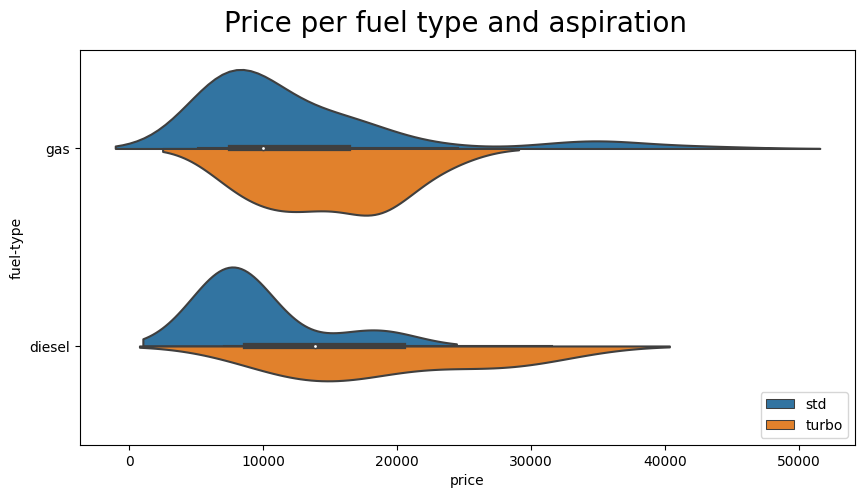

In [145]:
# price / fuel type / aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "price", 
               y = "fuel-type", 
               hue = "aspiration", 
               split = True)

# Customise plot
plt.suptitle("Price per fuel type and aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

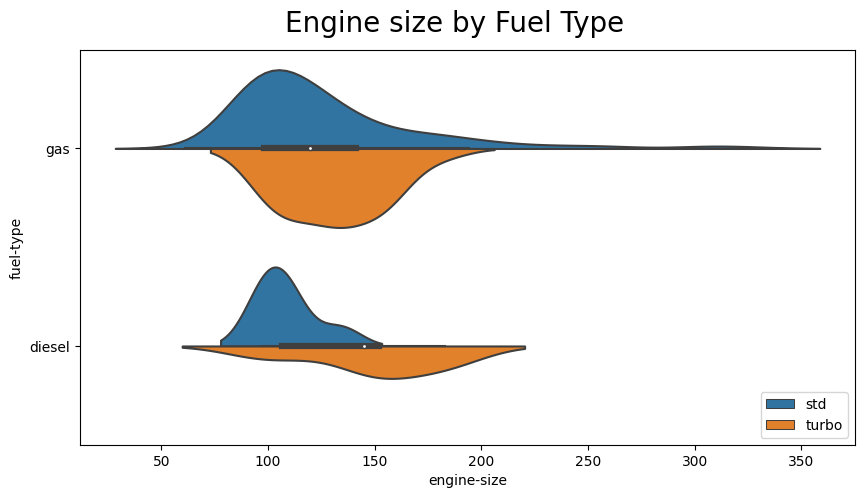

In [146]:
# fuel type and engine size
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "engine-size", 
               y = "fuel-type", 
               hue = "aspiration", 
               split = True)

# Customise plot
plt.suptitle("Engine size by Fuel Type", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

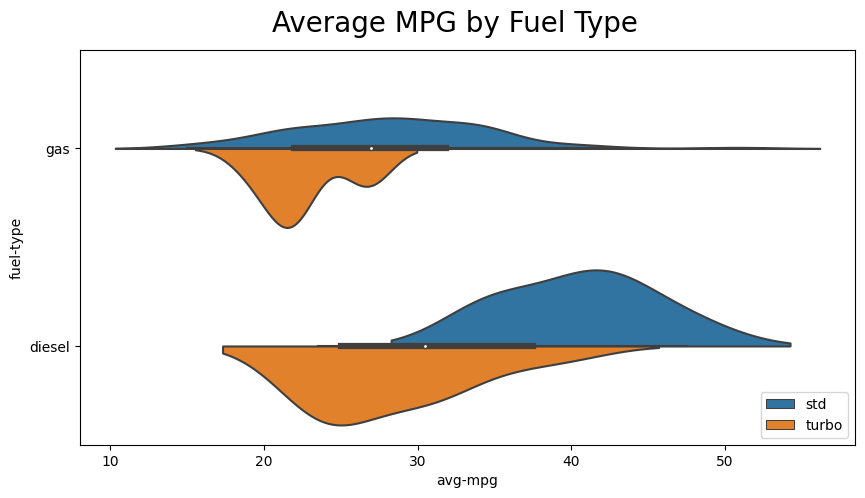

In [147]:
# fuel type and engine size
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "avg-mpg", 
               y = "fuel-type",
               hue = "aspiration", 
               split = True)

# Customise plot
plt.suptitle("Average MPG by Fuel Type", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

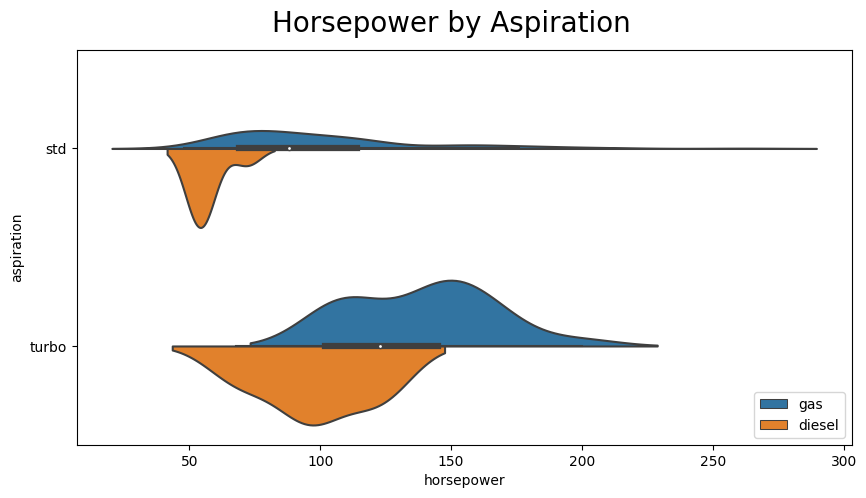

In [148]:
# fuel type and engine size
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "horsepower", 
               y = "aspiration", 
               hue = "fuel-type", 
               split = True)

# Customise plot
plt.suptitle("Horsepower by Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

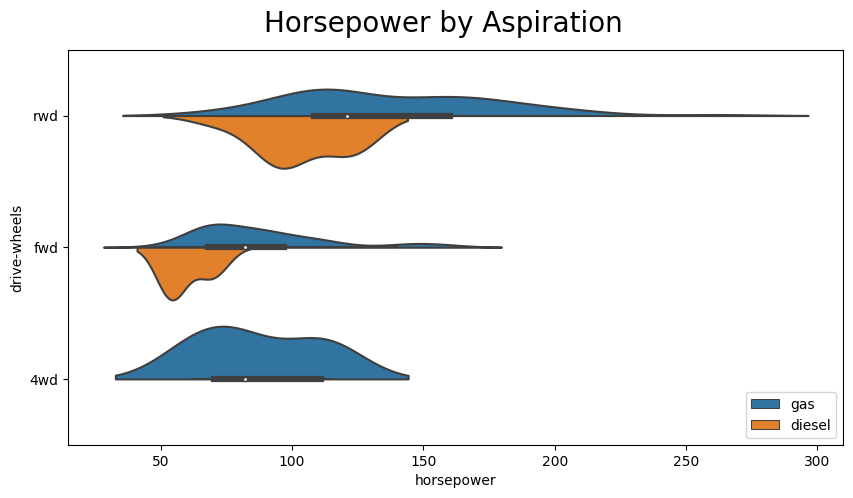

In [149]:
# fuel type and engine size
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "horsepower", 
               y = "drive-wheels",
               hue = "fuel-type", 
               split = True)

# Customise plot
plt.suptitle("Horsepower by Aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

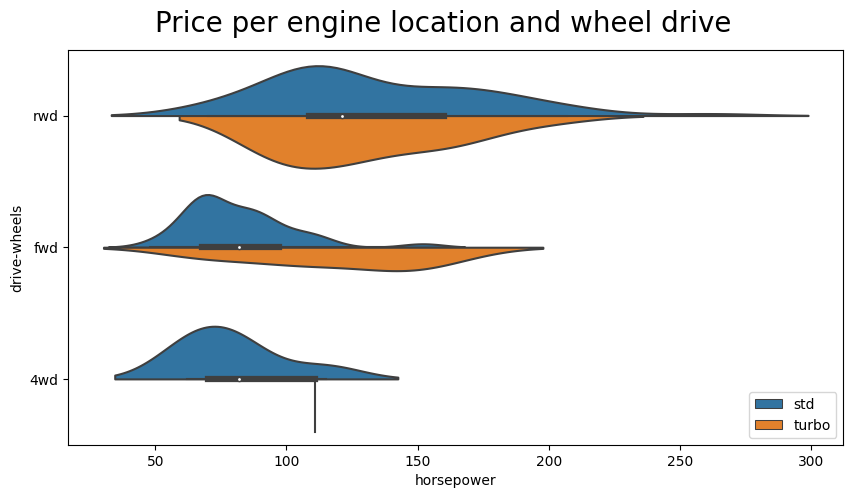

In [150]:
# Engine horsepower / aspiration / drive wheels
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "horsepower", 
               y = "drive-wheels", 
               hue = "aspiration", 
               split = True)

# Customise plot
plt.suptitle("Price per engine location and wheel drive", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

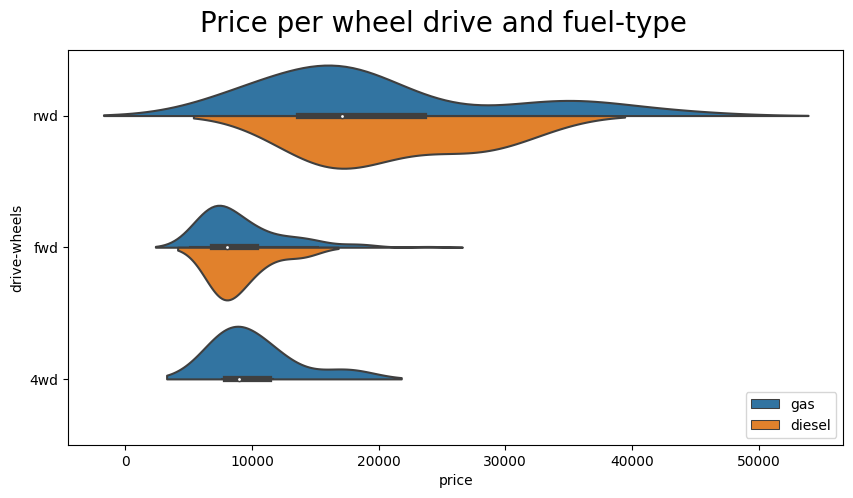

In [151]:
# price / fuel type / drive wheels
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "price", 
               y = "drive-wheels", 
               hue = "fuel-type", 
               split = True)

# Customise plot
plt.suptitle("Price per wheel drive and fuel-type", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

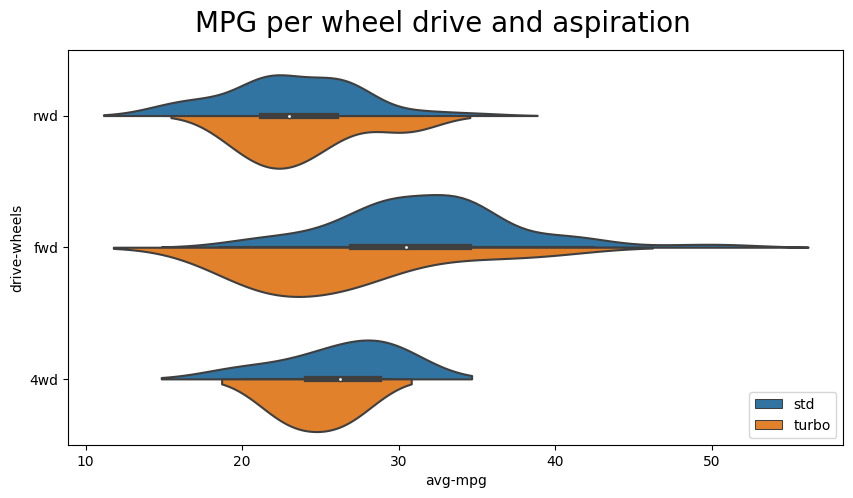

In [152]:
# Engine MPG / drive wheels / aspiration
plt.figure(figsize=(10,5))
sns.violinplot(automobile_df, 
               x = "avg-mpg", 
               y = "drive-wheels", 
               hue = "aspiration", 
               split = True)

# Customise plot
plt.suptitle("MPG per wheel drive and aspiration", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.legend(loc = "lower right")

# Show Plot.
plt.show()
plt.close()

<AxesSubplot: xlabel='curb-weight', ylabel='engine-size'>

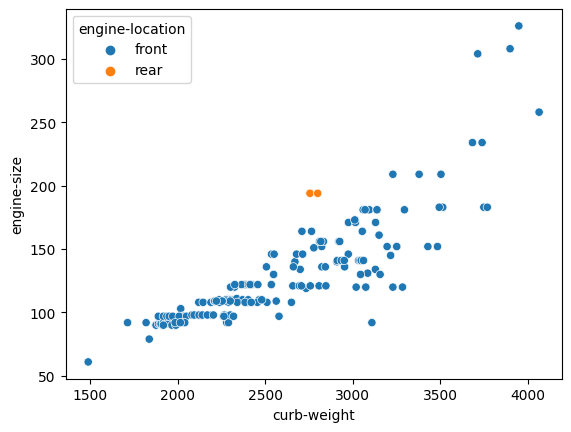

In [153]:
# Engine Size / MPG Scatter
sns.scatterplot(x = "curb-weight", y = "engine-size", data = automobile_df, hue = "engine-location")

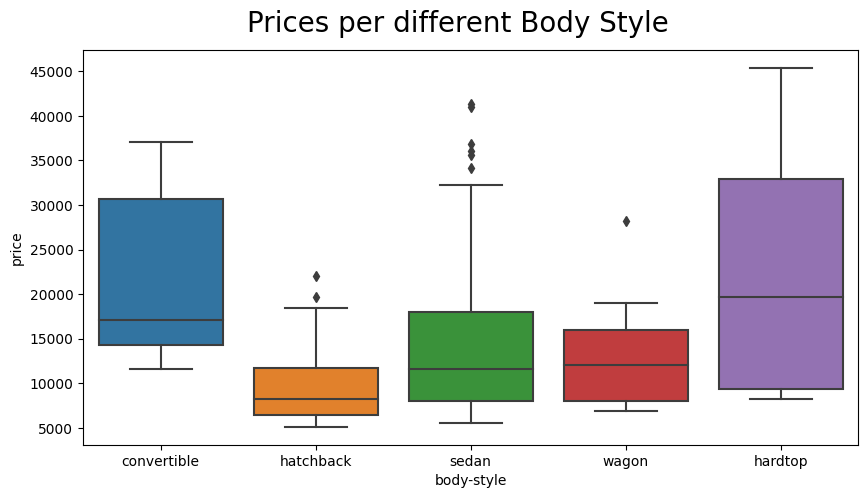

In [154]:
# price/ body-style
plt.figure(figsize=(10,5))
sns.boxplot(automobile_df, x = "body-style", y = "price")

plt.suptitle("Prices per different Body Style", fontsize = 20)
plt.subplots_adjust(top=0.9)

plt.show()
plt.close()

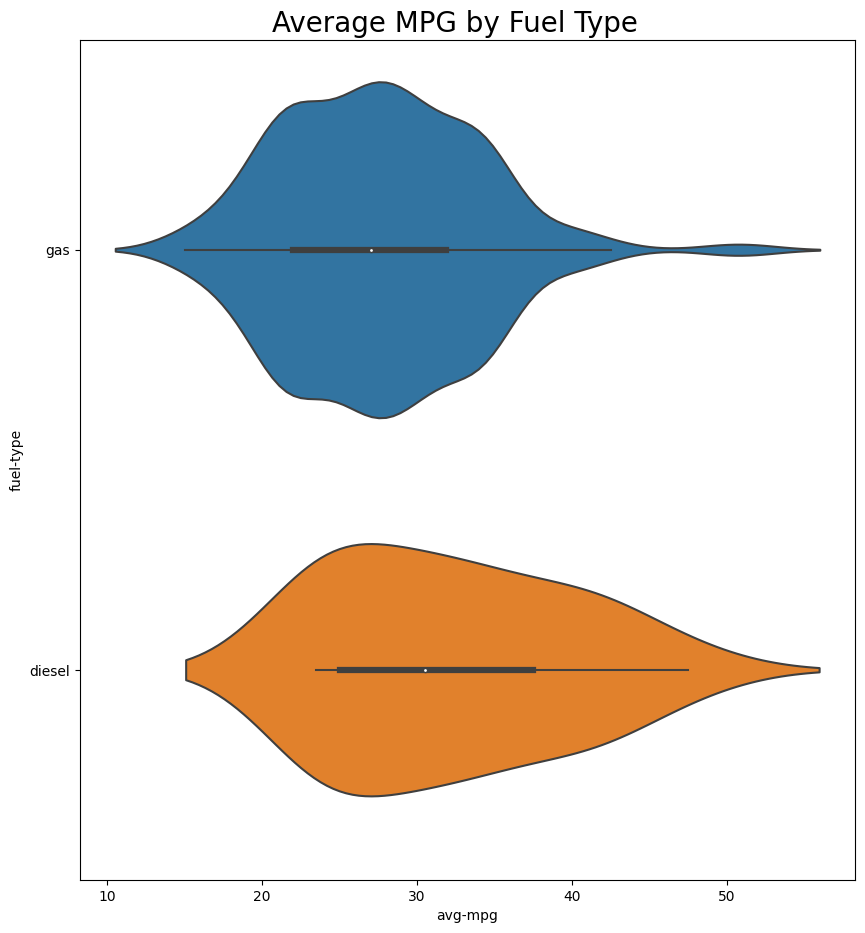

In [155]:
# fuel type for average mpg
plt.figure(figsize=(10,10))
sns.violinplot(automobile_df, x = "avg-mpg", y = "fuel-type")

# Customise plot
plt.suptitle("Average MPG by Fuel Type", fontsize = 20)
plt.subplots_adjust(top=0.95)

# Show Plot.
plt.show()
plt.close()

In [156]:
#### scale horsepower, engine-size, curb weight
scaled_data1 = minmax_scaling(automobile_df['horsepower'],
                             columns = [0])
scaled_data2 = minmax_scaling(automobile_df['engine-size'],
                             columns = [0])
scaled_data3 = minmax_scaling(automobile_df['curb-weight'],
                             columns = [0])
scaled_data4 = minmax_scaling(automobile_df['peak-rpm'],
                             columns = [0])
scaled_data5 = minmax_scaling(automobile_df['bore'],
                             columns = [0])
scaled_data6 = minmax_scaling(automobile_df['stroke'],
                             columns = [0])
scaled_data7 = minmax_scaling(automobile_df['length'],
                             columns = [0])
scaled_data8 = minmax_scaling(automobile_df['wheel-base'],
                             columns = [0])
scaled_data9 = minmax_scaling(automobile_df['height'],
                             columns = [0])
scaled_data10 = minmax_scaling(automobile_df['width'],
                             columns = [0])
scaled_data11 = minmax_scaling(automobile_df['compression-ratio'],
                             columns = [0])
scaled_data12 = minmax_scaling(automobile_df['body-volume'],
                             columns = [0])
scaled_data13 = minmax_scaling(automobile_df['density'],
                             columns = [0])

# Add scale horsepower, engine-size, curb weight to df
automobile_df["scaled_horsepower"] = scaled_data1
automobile_df["scaled_engine-size"] = scaled_data2
automobile_df["scaled_curb-weight"] = scaled_data3
automobile_df["scaled_rpm"] = scaled_data4
automobile_df["scaled_bore"] = scaled_data5
automobile_df["scaled_stroke"] = scaled_data6
automobile_df["scaled_length"] = scaled_data7
automobile_df["scaled_wheel-base"] = scaled_data8
automobile_df["scaled_height"] = scaled_data9
automobile_df["scaled_width"] = scaled_data10
automobile_df["scaled_compression-ratio"] = scaled_data11
automobile_df["scaled_body-volume"] = scaled_data12
automobile_df["scaled_density"] = scaled_data13

C:\Users\karlb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


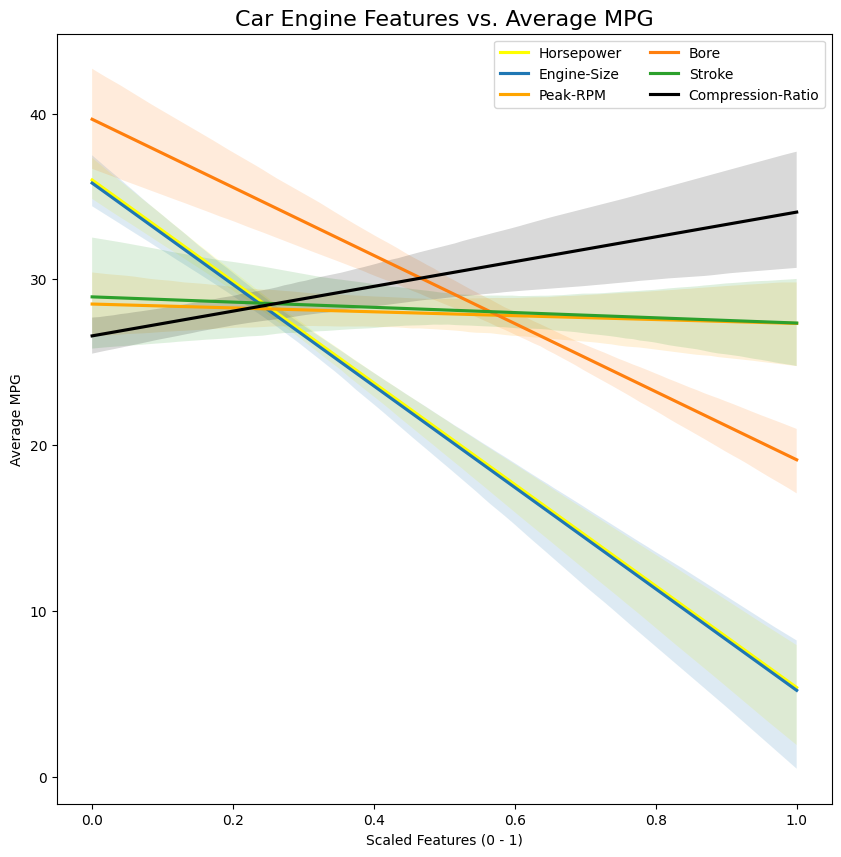

<function matplotlib.pyplot.close(fig=None)>

In [157]:
# Plot scaled features by Average MPG
plt.figure(figsize=(10,10))
sns.regplot(x="scaled_horsepower", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Horsepower", color = "yellow")
sns.regplot(x="scaled_engine-size", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Engine-Size")
sns.regplot(x="scaled_rpm", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Peak-RPM", color = "orange")
sns.regplot(x="scaled_bore", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Bore")
sns.regplot(x="scaled_stroke", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Stroke")
sns.regplot(x="scaled_compression-ratio", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Compression-Ratio", color = "black")

# Customise Graph
plt.title("Car Engine Features vs. Average MPG", size = 16)
plt.legend(loc = "upper right", ncol = 2)
plt.xlabel("Scaled Features (0 - 1)")
plt.ylabel("Average MPG")

# show plot
plt.show()
plt.close

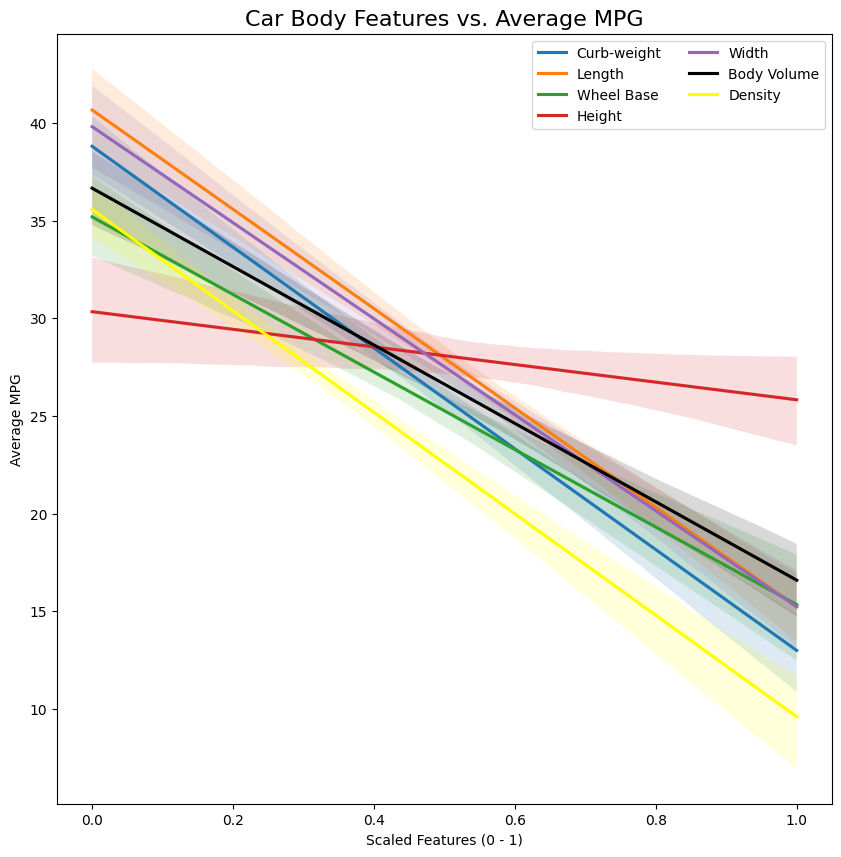

<function matplotlib.pyplot.close(fig=None)>

In [158]:
# Plot scaled features by Average MPG
plt.figure(figsize=(10,10))
sns.regplot(x="scaled_curb-weight", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Curb-weight")
sns.regplot(x="scaled_length", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Length")
sns.regplot(x="scaled_wheel-base", y= "avg-mpg", data=automobile_df,
            scatter = False, label = "Wheel Base")
sns.regplot(x="scaled_height", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Height")
sns.regplot(x="scaled_width", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Width")
sns.regplot(x="scaled_body-volume", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Body Volume", color = "black")
sns.regplot(x="scaled_density", y= "avg-mpg", data=automobile_df, 
            scatter = False, label = "Density", color = "yellow")

# Customise Graph
plt.title("Car Body Features vs. Average MPG", size = 16)
plt.legend(loc = "upper right", ncol = 2)
plt.xlabel("Scaled Features (0 - 1)")
plt.ylabel("Average MPG")

# show plot
plt.show()
plt.close

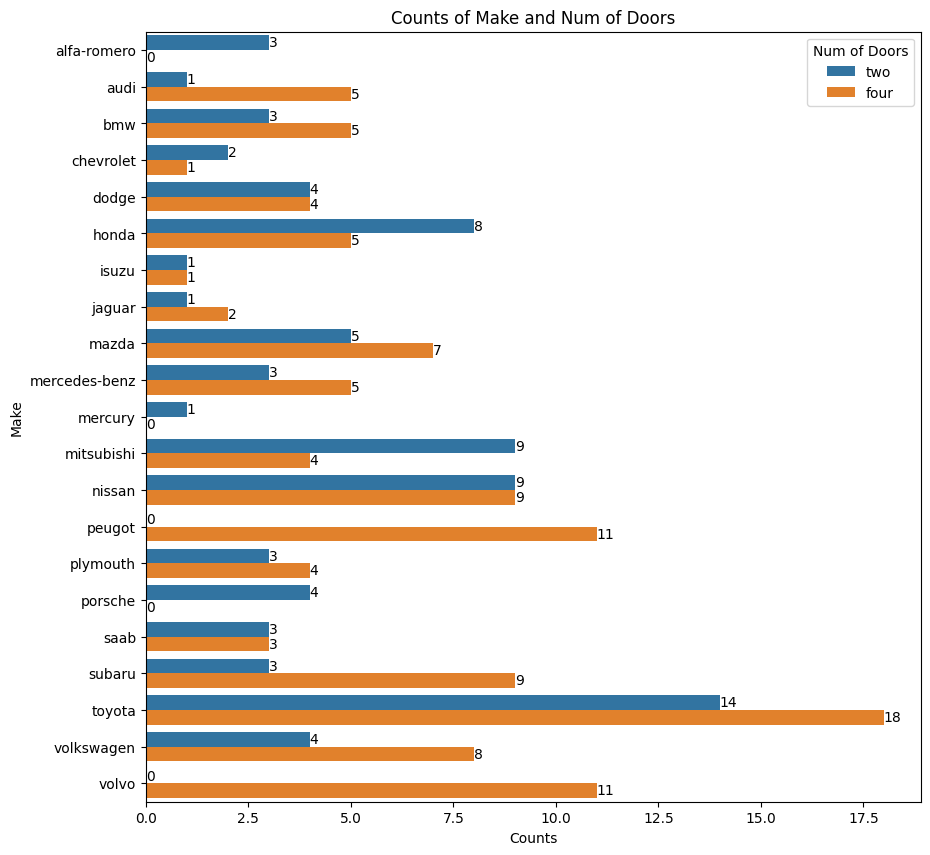

In [159]:
# Group by make and num of doors.
automobile_df.groupby(["make", "num-of-doors"]).size()

# Create countplot (of num doors is categorical)
plt.figure(figsize = (10,10))
ax = sns.countplot(y='make', hue='num-of-doors', data=automobile_df, orient='h')

# Customise PLot 
plt.xlabel("Counts")
plt.ylabel("Make")
plt.title("Counts of Make and Num of Doors")
plt.legend(title = "Num of Doors")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()

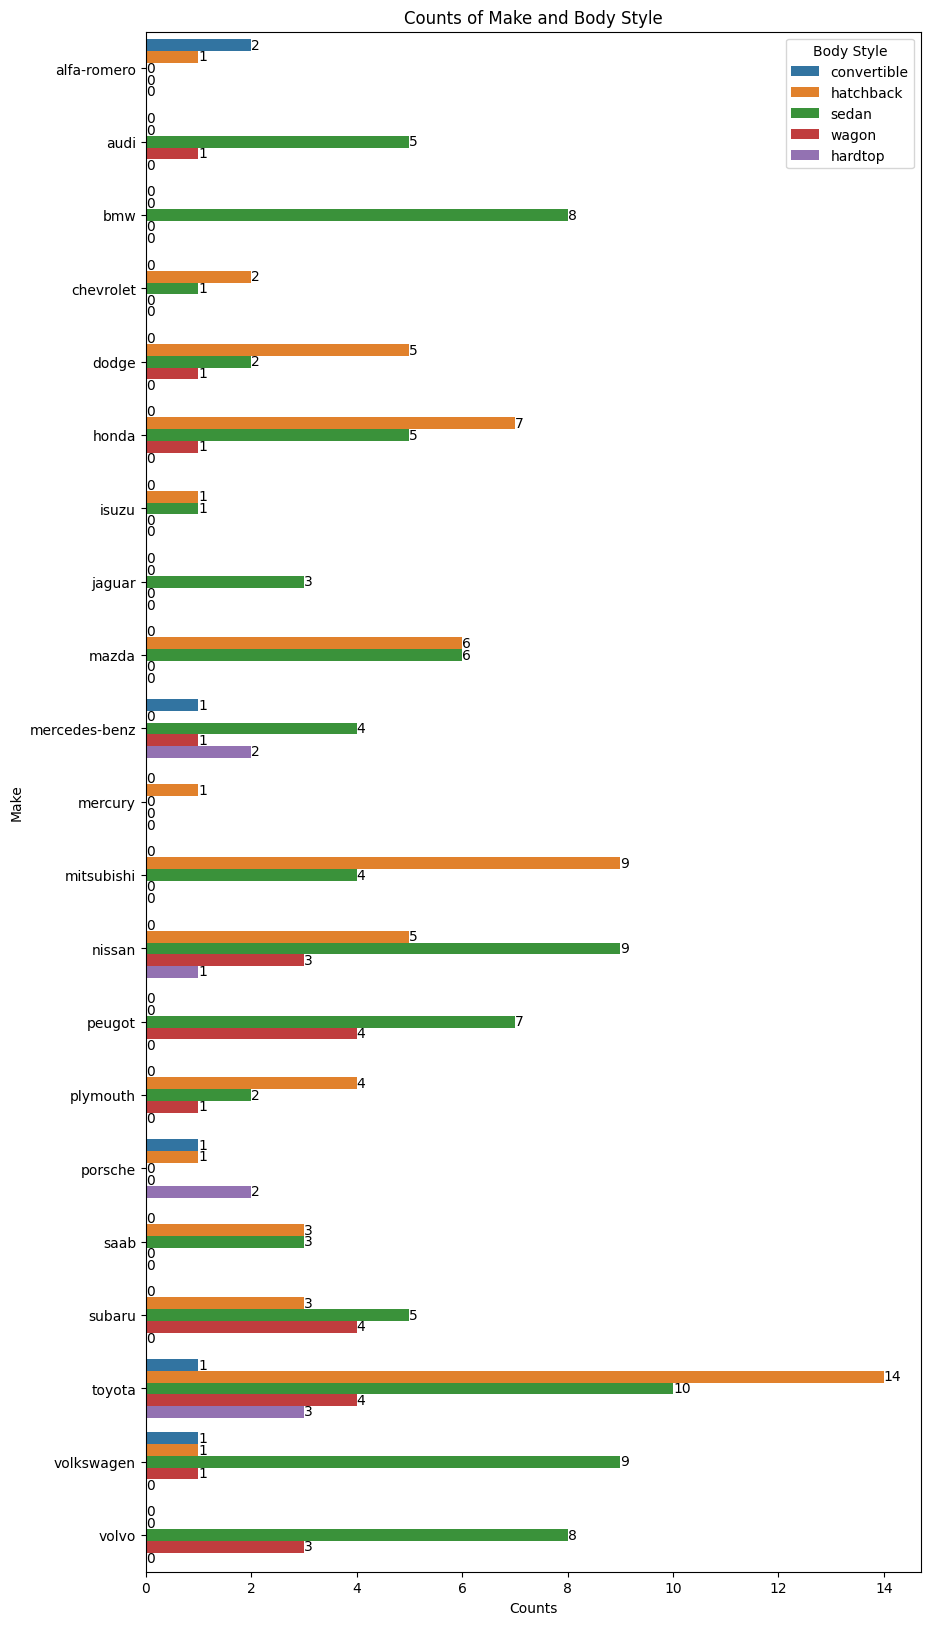

In [160]:
# Group by make and body_style
automobile_df.groupby(["make", "body-style"]).size()

# Create countplot (of num doors is categorical)
plt.figure(figsize = (10,20))
ax = sns.countplot(y='make', 
                   hue='body-style', 
                   data=automobile_df,
                   orient='h')

# Customise PLot 
plt.xlabel("Counts")
plt.ylabel("Make")
plt.title("Counts of Make and Body Style")
plt.legend(title = "Body Style")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()

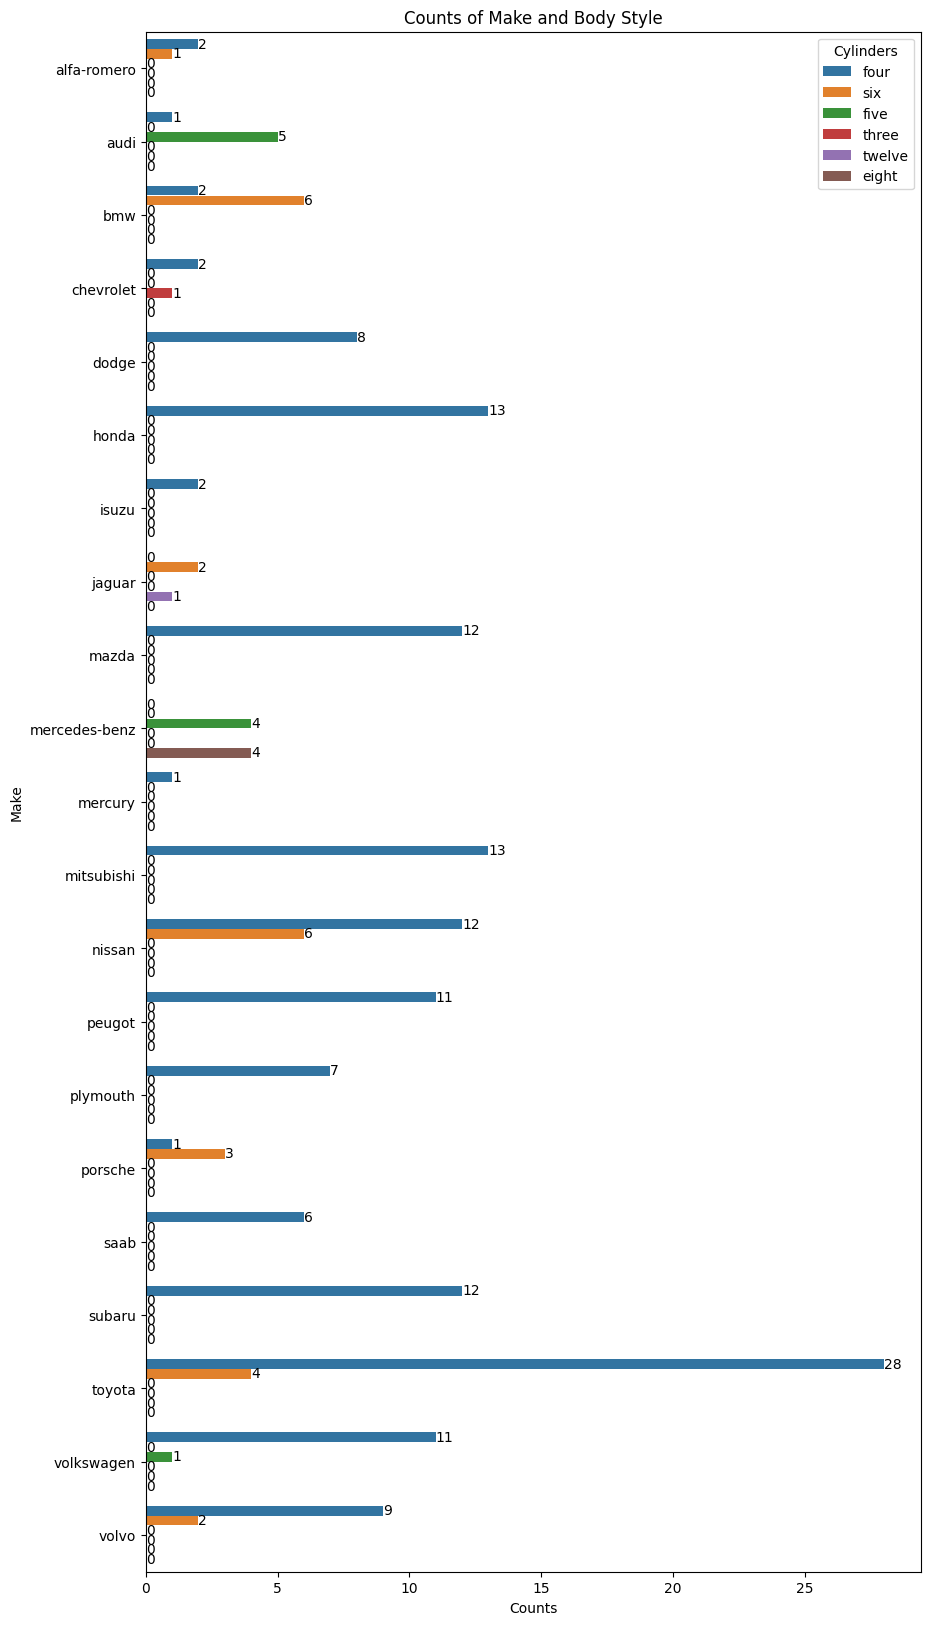

In [161]:
# Group by make and body_style
automobile_df.groupby(["make", "num-of-cylinders"]).size()

# Create countplot (of num doors is categorical)
plt.figure(figsize = (10,20))
ax = sns.countplot(y="make", 
                   hue="num-of-cylinders", 
                   data=automobile_df,
                   orient="h")

# Customise PLot 
plt.xlabel("Counts")
plt.ylabel("Make")
plt.title("Counts of Make and Body Style")
plt.legend(title = "Cylinders")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

# Show plot
plt.show()
plt.close()

# Not best plot type, lets look at someothers.

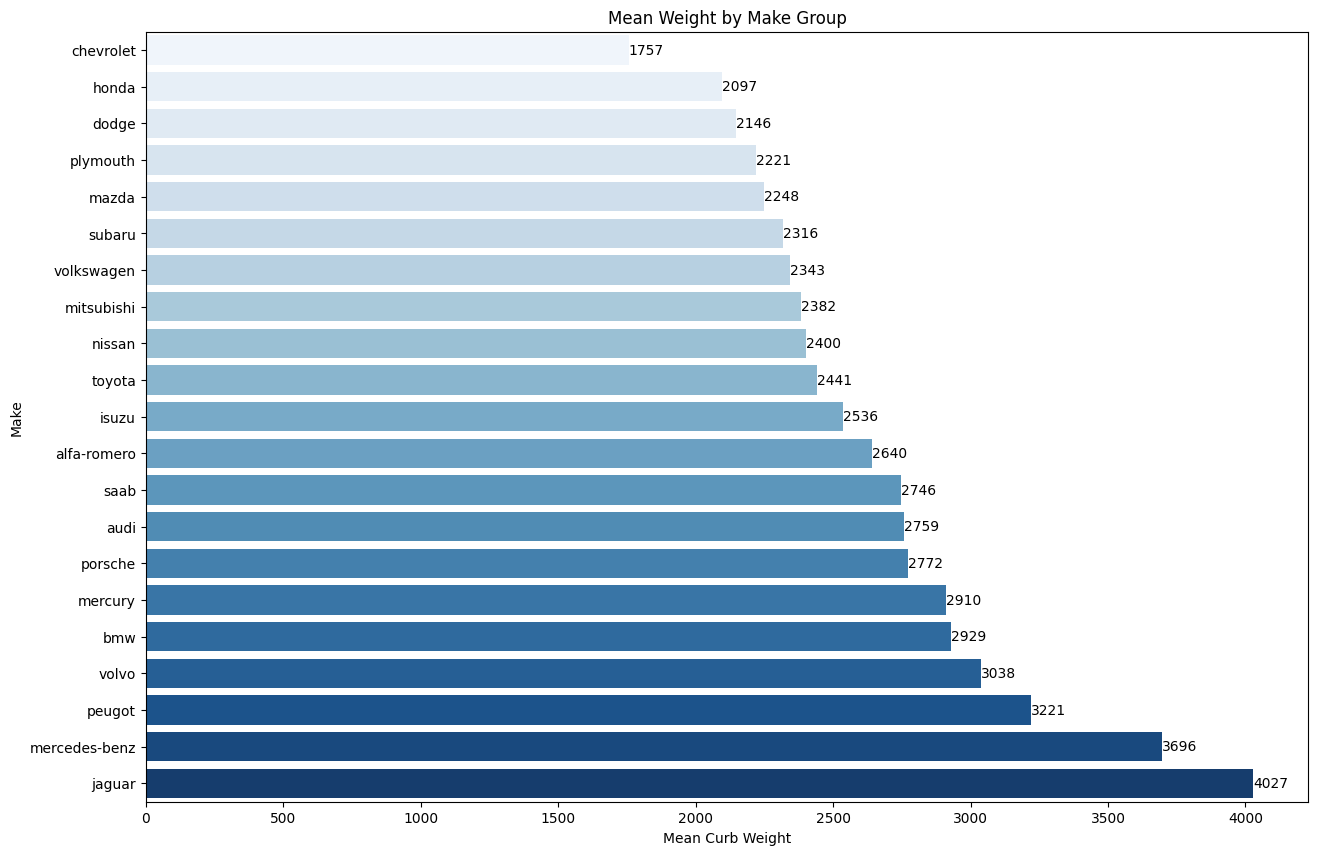

In [164]:
# Calculate mean weight per car make.
makes_weight_grouped = (automobile_df.groupby("make")
                       ["curb-weight"].mean().round().sort_values(ascending=True))

# Bar plot avg price per car make
plt.figure(figsize = (15,10))
ax = sns.barplot(x=makes_weight_grouped.values,
                 y=makes_weight_grouped.index, 
                 orient='h',
                 palette="Blues")

#Customise Plot
plt.xlabel("Mean Curb Weight")
plt.ylabel("Make")
plt.title("Mean Weight by Make Group")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

plt.show()


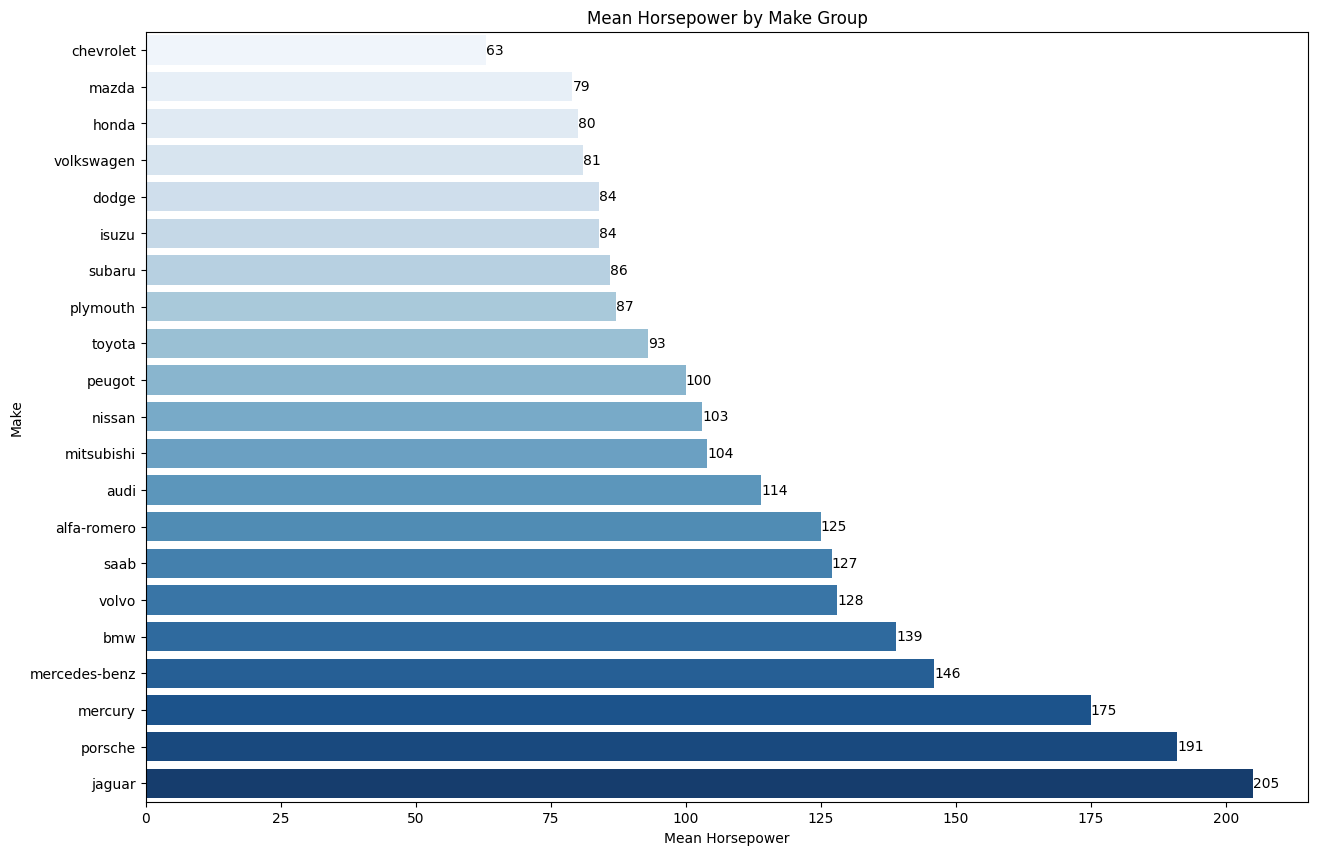

In [165]:
# Calculate mean horsepower per car make.
makes_horse_grouped = (automobile_df.groupby("make")
                       ["horsepower"].mean().round().sort_values(ascending=True))

# Bar plot avg price per car make
plt.figure(figsize = (15,10))
ax = sns.barplot(x=makes_horse_grouped.values,
                 y=makes_horse_grouped.index, 
                 orient='h',
                 palette="Blues")

#Customise Plot
plt.xlabel("Mean Horsepower")
plt.ylabel("Make")
plt.title("Mean Horsepower by Make Group")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

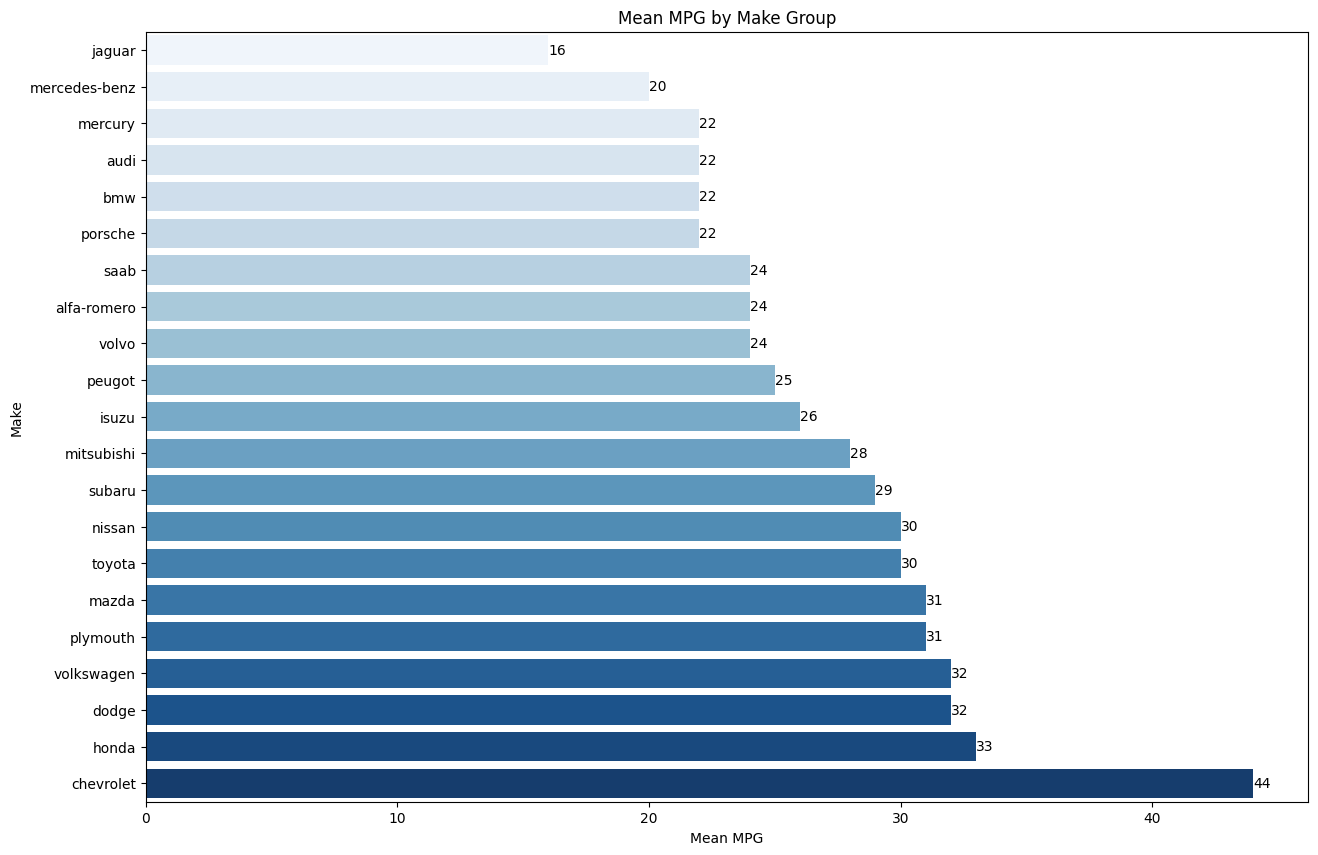

In [167]:
# Calculate mean MPG per car make.
makes_mpg_grouped = (automobile_df.groupby("make")
                       ["avg-mpg"].mean().round().sort_values(ascending=True))

# Bar plot avg price per car make
plt.figure(figsize = (15,10))
ax = sns.barplot(x=makes_mpg_grouped.values,
                 y=makes_mpg_grouped.index, 
                 orient='h',
                 palette="Blues")

#Customise Plot
plt.xlabel("Mean MPG")
plt.ylabel("Make")
plt.title("Mean MPG by Make Group")

# Show bar labels
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

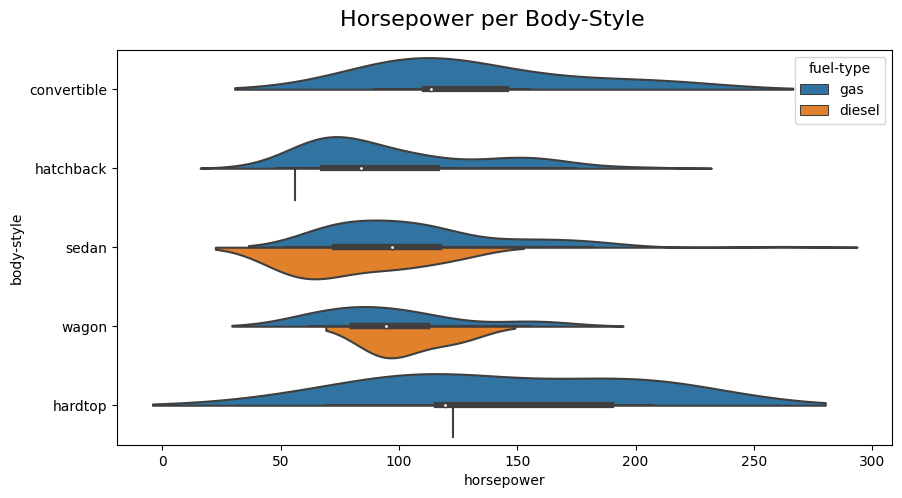

In [ ]:
# Horsepower / body style
plt.figure(figsize = (10,5))
sns.violinplot(automobile_df, 
               x = "horsepower", 
               y = "body-style", 
               hue = "fuel-type", 
               split=True)

# Customise plot
plt.suptitle("Horsepower per Body-Style", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

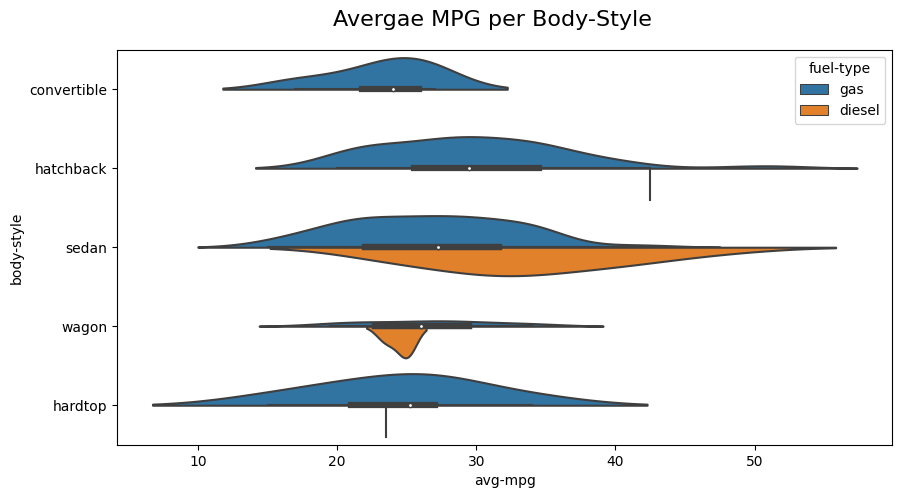

In [ ]:
# MPG / body style
plt.figure(figsize = (10,5))
sns.violinplot(automobile_df, 
               x = "avg-mpg", 
               y = "body-style", 
               hue = "fuel-type", 
               split=True)

# Customise plot
plt.suptitle("Avergae MPG per Body-Style", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

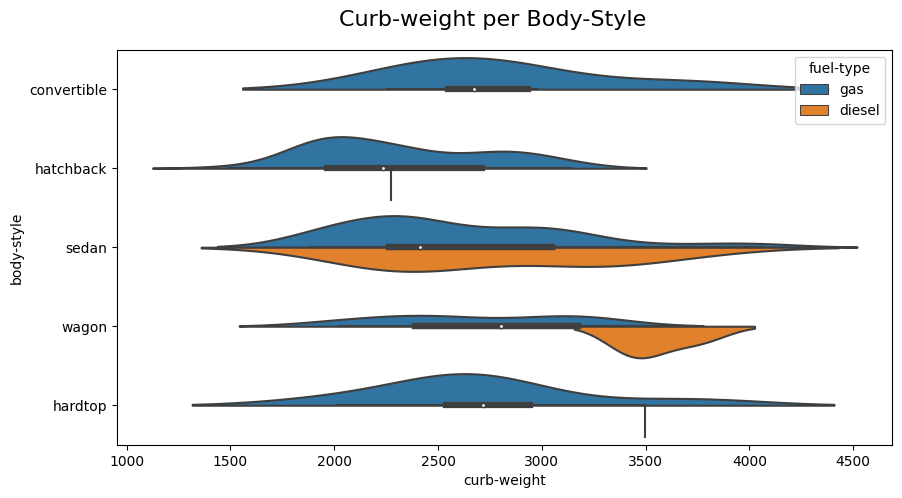

In [ ]:
# weight / body style
plt.figure(figsize = (10,5))
sns.violinplot(automobile_df, 
               x = "curb-weight", 
               y = "body-style", 
               hue = "fuel-type", 
               split=True)

# Customise plot
plt.suptitle("Curb-weight per Body-Style", fontsize = 16)
plt.subplots_adjust(top=0.9)

# Show Plot.
plt.show()
plt.close()

## See main report for analysis